# ***EVAT DATA MODEL DEVELOPMENT***


Leverages a EV reference Charging Session Transactions weekly/annual charging patterns.

Localises the charging Session transaction to Melbourne Victoris.

Update the charging session transactions with modern day EV battery capacities.

Incorporates Victoria Wholesale Electricity Prices

Creation of Database Table CSV Files

Lists additional inter-table Entity relationships required to construct a Database

# Importation of EV REFERENCE  Charging Session Transactions& Data Analysis

## Data Preprocessing

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
df= pd.read_csv('station_data_dataverse.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sessionId       3395 non-null   int64  
 1   kwhTotal        3395 non-null   float64
 2   dollars         3395 non-null   float64
 3   created         3395 non-null   object 
 4   ended           3395 non-null   object 
 5   startTime       3395 non-null   int64  
 6   endTime         3395 non-null   int64  
 7   chargeTimeHrs   3395 non-null   float64
 8   weekday         3395 non-null   object 
 9   platform        3395 non-null   object 
 10  distance        2330 non-null   float64
 11  userId          3395 non-null   int64  
 12  stationId       3395 non-null   int64  
 13  locationId      3395 non-null   int64  
 14  managerVehicle  3395 non-null   int64  
 15  facilityType    3395 non-null   int64  
 16  Mon             3395 non-null   int64  
 17  Tues            3395 non-null   i

In [4]:
#display columns
df.columns

Index(['sessionId', 'kwhTotal', 'dollars', 'created', 'ended', 'startTime',
       'endTime', 'chargeTimeHrs', 'weekday', 'platform', 'distance', 'userId',
       'stationId', 'locationId', 'managerVehicle', 'facilityType', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip'],
      dtype='object')

In [5]:
#calculate sum of null values
df.isnull().sum()

,0
sessionId,0
kwhTotal,0
dollars,0
created,0
ended,0
startTime,0
endTime,0
chargeTimeHrs,0
weekday,0
platform,0


In [6]:
#display all columns
pd.set_option('display.max_columns', None)

In [7]:
df.head(2)

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,4926737,23.68,0.5,0015-10-03 07:18:43,0015-10-03 11:25:07,7,11,4.106667,Sat,android,NaN,78908148,730023,878393,0,1,0,0,0,0,0,1,0,0
1,3738844,22.14,0.0,0015-08-01 05:29:02,0015-08-01 09:00:08,5,9,3.518333,Sat,android,NaN,78908148,730023,878393,0,1,0,0,0,0,0,1,0,0


## Finding the number of Unique stations, Users, Charge Sessions

In [8]:
#number of duplicate entries
print('Duplicate entries found in this dataset = {}.' .format(df.duplicated().sum()))

Duplicate entries found in this dataset = 0.


In [9]:
# count numner of unique ussessionId in df
unique_session_count = df['sessionId'].nunique()
print(f"The number of unique session IDs is: {unique_session_count}")

The number of unique session IDs is: 3395


In [10]:
# count numner of unique userId in df
unique_user_count = df['userId'].nunique()
print(f"The number of unique user IDs is: {unique_user_count}")

The number of unique user IDs is: 85


In [11]:
# count numner of unique locationId in df
unique_location_count = df['locationId'].nunique()
print(f"The number of unique location IDs is: {unique_location_count}")

The number of unique location IDs is: 25


In [12]:
# count numner of unique stationId in df
unique_station_count = df['stationId'].nunique()
print(f"The number of unique station IDs is: {unique_station_count}")

The number of unique station IDs is: 105


## Installed Charging Stations Share at the Facility

In [13]:
# create a new column and convert 1 to manufacturing, 2 to office, 3 to R&D and 4 to others in facilityType
df['facilityType'] = df['facilityType'].replace([1,2,3,4],['Manufacturing','Office','R&D','Others'])

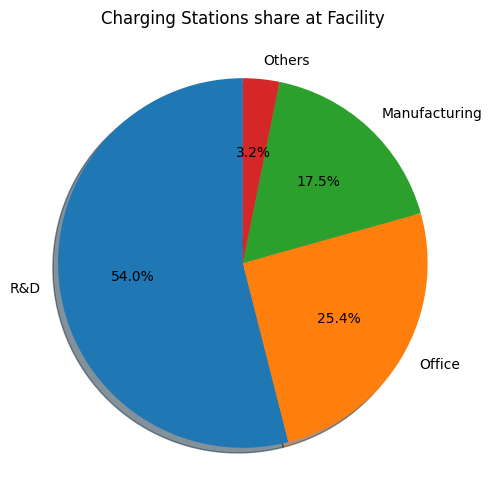

In [14]:

#pie chart of facilityType
plt.figure(figsize=(10,6))
df['facilityType'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Charging Stations share at Facility')
plt.ylabel('')
plt.show()



In [15]:
!pip install plotly.express
import plotly.express as px

In [16]:
df.head(5)

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,4926737,23.68,0.5,0015-10-03 07:18:43,0015-10-03 11:25:07,7,11,4.106667,Sat,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0
1,3738844,22.14,0.0,0015-08-01 05:29:02,0015-08-01 09:00:08,5,9,3.518333,Sat,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0
2,2682332,22.07,0.0,0015-09-02 13:43:27,0015-09-02 17:38:10,13,17,3.911944,Wed,android,NaN,78908148,995505,868085,0,R&D,0,0,1,0,0,0,0,0
3,9025610,22.03,0.0,0015-05-29 16:55:35,0015-05-29 20:54:06,16,20,3.975278,Fri,android,NaN,78908148,863084,751082,0,Others,0,0,0,0,1,0,0,0
4,4473237,21.20,0.0,0015-09-30 16:52:49,0015-09-30 20:42:06,16,20,3.821389,Wed,android,NaN,78908148,664306,868085,0,R&D,0,0,1,0,0,0,0,0


In [17]:
#Plot Start Burxt diagram
fig = px.sunburst(
    df,
    path=['facilityType', 'locationId', 'stationId', ],  # Changed 'facilityTypen' to 'facilityType'
    height=1000
)

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()

In [18]:
#Plot Start Burxt diagram
fig = px.sunburst(
    df,
    path=['facilityType', 'locationId', 'stationId','userId' ],  # Changed 'facilityTypen' to 'facilityType'
    height=1000
)

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))

fig.show()

In [19]:
# prompt: group by facilityType and sum of kwhTotal

grouped_df = df.groupby('facilityType')['kwhTotal'].sum()
grouped_df

,kwhTotal
facilityType,
Manufacturing,3411.26
Office,4829.75
Others,779.44
R&D,10703.24


## Daily Power Consumption

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning:

60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning:

53.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning:

60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning:

58.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning:

57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categor

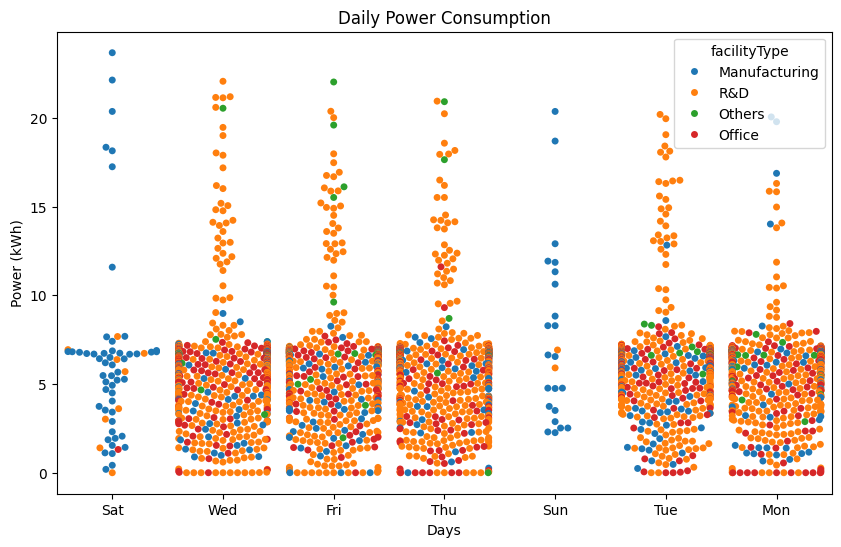

In [20]:
#convert facilityType to Catagorical data
df['facilityType'] = df['facilityType'].replace([1,2,3,4],['Manufacturing','Office','R&D','Others'])

#visualize daily power consumption
plt.figure(figsize=(10,6))
sns.swarmplot(data=df, y='kwhTotal', x='weekday', hue='facilityType')
plt.title('Daily Power Consumption')
plt.xlabel('Days')
plt.ylabel('Power (kWh)')
plt.show()

<ipython-input-21-f22bca7dbb2b>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




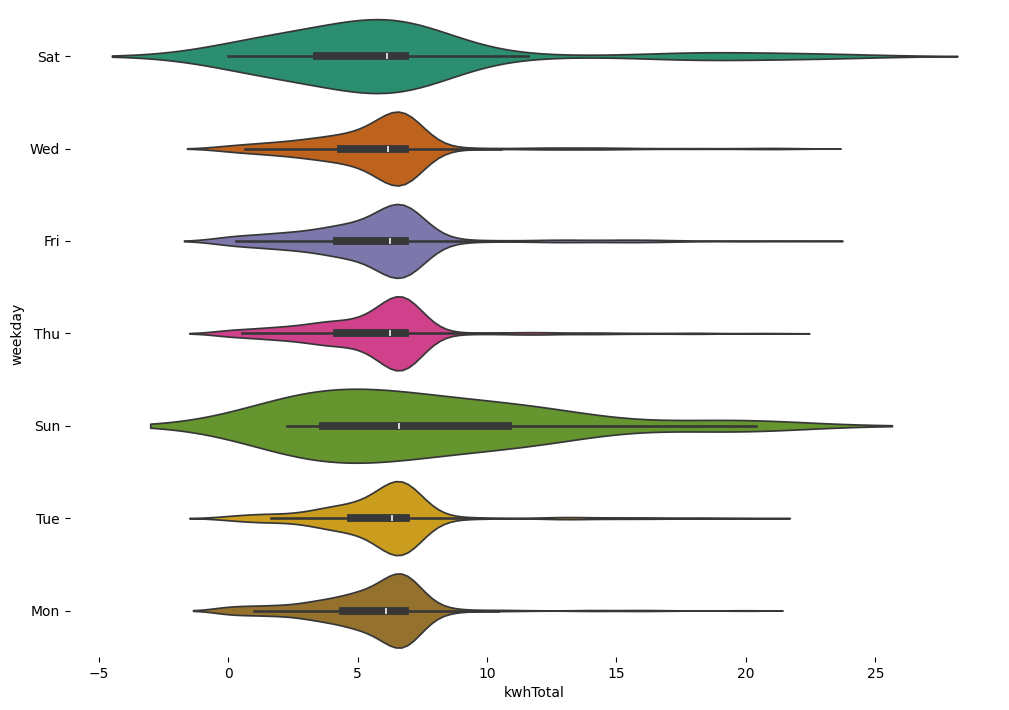

In [21]:
# @title weekday vs KWdelivered

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['weekday'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='kwhTotal', y='weekday', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Review of # Stations in  LocationID  Statistics

In [22]:
# prompt: Group by locationId and count the number of unique stationIdn and sum of  kwhTotal  and FacilityType in decending order

# Group by locationId
grouped = df.groupby('locationId').agg(
    {'stationId': pd.Series.nunique, 'kwhTotal': 'sum', 'facilityType': lambda x: x.mode()[0] if not x.mode().empty else None})

# Rename columns for clarity
grouped = grouped.rename(columns={
    'stationId': 'unique_station_count',
    'kwhTotal': 'total_kwh',
    'facilityType': 'mode_facility_type'
})

# Sort by total_kwh in descending order
grouped = grouped.sort_values(by='total_kwh', ascending=False)

grouped

,unique_station_count,total_kwh,mode_facility_type
locationId,,,
493904,2,2805.86,Manufacturing
976902,8,2572.93,R&D
461655,12,2096.62,R&D
868085,6,1948.03,R&D
481066,4,1658.65,Office
928191,8,1083.76,R&D
144857,6,1010.98,Office
503205,4,983.77,R&D
566549,4,753.23,R&D


## Drop Data ( If required)

In [23]:
# prompt: Drop Rowds with 'Manufacturing'' and 'Others'

# Drop rows where 'facilityType' is 'Manufacturing' or 'Others'
#df = df[~df['facilityType'].isin(['Manufacturing', 'Others'])]

## Review of LocationId & Stations Counts

In [24]:
# prompt: Group by locationId and count the number of unique stationID decending order

# Assuming 'df' is your DataFrame from the previous code

# Group by 'locationId' and count unique 'stationId'
location_station_counts = df.groupby('locationId')['stationId'].nunique().sort_values(ascending=False)

location_station_counts

,stationId
locationId,
648339,14
461655,12
976902,8
928191,8
202527,6
868085,6
144857,6
481066,4
399399,4


In [25]:
# prompt: list all the locationId from  location_station_counts

print(location_station_counts.index.tolist())

location_list = location_station_counts.index.tolist()

[648339, 461655, 976902, 928191, 202527, 868085, 144857, 481066, 399399, 620906, 503205, 566549, 517854, 978130, 814002, 493904, 125372, 878393, 948590, 700367, 751082, 454147, 310085, 747048, 572514]


In [26]:
# prompt: Create a list of all stationId for each locationId in location_list

# Assuming 'df' and 'location_list' are defined as in the previous code.

station_id_by_location = {}
for location_id in location_list:
  station_ids = df[df['locationId'] == location_id]['stationId'].unique().tolist()
  station_id_by_location[location_id] = station_ids

# Print or use the dictionary as needed
for location, station_ids in station_id_by_location.items():
  print(f"Location ID: {location}, Station IDs: {station_ids}")

Location ID: 648339, Station IDs: [488364, 540225, 914305, 884707, 922416, 787792, 914907, 481613, 864630, 451479, 286084, 587514, 988981, 926676]
Location ID: 461655, Station IDs: [920264, 569889, 878706, 549414, 582873, 371335, 129465, 594591, 612116, 431796, 943765, 632920]
Location ID: 976902, Station IDs: [944515, 405157, 250527, 280221, 500856, 738900, 801274, 355208]
Location ID: 928191, Station IDs: [944575, 207262, 711566, 728918, 236379, 425476, 256233, 894409]
Location ID: 202527, Station IDs: [507660, 672450, 792421, 911231, 260781, 200695]
Location ID: 868085, Station IDs: [995505, 664306, 932939, 638536, 489543, 569886]
Location ID: 144857, Station IDs: [572249, 951880, 803398, 517464, 568071, 891421]
Location ID: 481066, Station IDs: [474204, 260408, 191826, 562656]
Location ID: 399399, Station IDs: [758780, 280415, 404112, 946482]
Location ID: 620906, Station IDs: [236840, 989457, 623134, 134427]
Location ID: 503205, Station IDs: [653450, 228137, 349635, 693651]
Locatio

In [27]:
# prompt: create a single list of all the station_ids in station_id_by_location.items()

all_station_ids = []
for station_ids in station_id_by_location.values():
  all_station_ids.extend(station_ids)
all_station_ids

[488364,
 540225,
 914305,
 884707,
 922416,
 787792,
 914907,
 481613,
 864630,
 451479,
 286084,
 587514,
 988981,
 926676,
 920264,
 569889,
 878706,
 549414,
 582873,
 371335,
 129465,
 594591,
 612116,
 431796,
 943765,
 632920,
 944515,
 405157,
 250527,
 280221,
 500856,
 738900,
 801274,
 355208,
 944575,
 207262,
 711566,
 728918,
 236379,
 425476,
 256233,
 894409,
 507660,
 672450,
 792421,
 911231,
 260781,
 200695,
 995505,
 664306,
 932939,
 638536,
 489543,
 569886,
 572249,
 951880,
 803398,
 517464,
 568071,
 891421,
 474204,
 260408,
 191826,
 562656,
 758780,
 280415,
 404112,
 946482,
 236840,
 989457,
 623134,
 134427,
 653450,
 228137,
 349635,
 693651,
 514669,
 902592,
 414088,
 131897,
 643012,
 782629,
 729642,
 987396,
 366832,
 288445,
 386940,
 874950,
 219054,
 369001,
 955429,
 445920,
 871619,
 730023,
 265601,
 237105,
 575971,
 616125,
 818217,
 863084,
 929628,
 861532,
 300866,
 875343,
 981639]

In [28]:
# prompt: convert all all_station_ids to integer values

all_station_ids = [int(x) for x in all_station_ids]
all_station_ids

[488364,
 540225,
 914305,
 884707,
 922416,
 787792,
 914907,
 481613,
 864630,
 451479,
 286084,
 587514,
 988981,
 926676,
 920264,
 569889,
 878706,
 549414,
 582873,
 371335,
 129465,
 594591,
 612116,
 431796,
 943765,
 632920,
 944515,
 405157,
 250527,
 280221,
 500856,
 738900,
 801274,
 355208,
 944575,
 207262,
 711566,
 728918,
 236379,
 425476,
 256233,
 894409,
 507660,
 672450,
 792421,
 911231,
 260781,
 200695,
 995505,
 664306,
 932939,
 638536,
 489543,
 569886,
 572249,
 951880,
 803398,
 517464,
 568071,
 891421,
 474204,
 260408,
 191826,
 562656,
 758780,
 280415,
 404112,
 946482,
 236840,
 989457,
 623134,
 134427,
 653450,
 228137,
 349635,
 693651,
 514669,
 902592,
 414088,
 131897,
 643012,
 782629,
 729642,
 987396,
 366832,
 288445,
 386940,
 874950,
 219054,
 369001,
 955429,
 445920,
 871619,
 730023,
 265601,
 237105,
 575971,
 616125,
 818217,
 863084,
 929628,
 861532,
 300866,
 875343,
 981639]

In [29]:
# prompt: convert all_station_ids to a dataframe named df_all_station_ids

df_all_station_ids = pd.DataFrame({'station_id': all_station_ids})
df_all_station_ids.head(105)

,station_id
0,488364
1,540225
2,914305
3,884707
4,922416
...,...
100,929628
101,861532
102,300866
103,875343


In [30]:
# prompt: list cells of the dataframe df_all_station_ids that are NaN or 0 or -1

# Find cells that are NaN, 0, or -1
nan_or_zero_or_neg_one_cells = df_all_station_ids[
    (df_all_station_ids['station_id'].isna()) |
    (df_all_station_ids['station_id'] == 0) |
    (df_all_station_ids['station_id'] == -1)
]

nan_or_zero_or_neg_one_cells

,station_id


In [31]:
len(df_all_station_ids)

105

In [32]:
# prompt: convert all_stations_ids to integer

all_station_ids = [int(x) for x in all_station_ids]

In [33]:
# prompt: create a dataframe with the location_station_counts data with columnn stationID listing all the stationID and column locationId wiith each locationId

location_station_counts = df.groupby('locationId')['stationId'].nunique().sort_values(ascending=False)

# Create a DataFrame from the Series
location_station_df = pd.DataFrame({'locationId': location_station_counts.index,
                                   'stationID': location_station_counts.values})

location_station_df

,locationId,stationID
0,648339,14
1,461655,12
2,976902,8
3,928191,8
4,202527,6
5,868085,6
6,144857,6
7,481066,4
8,399399,4
9,620906,4


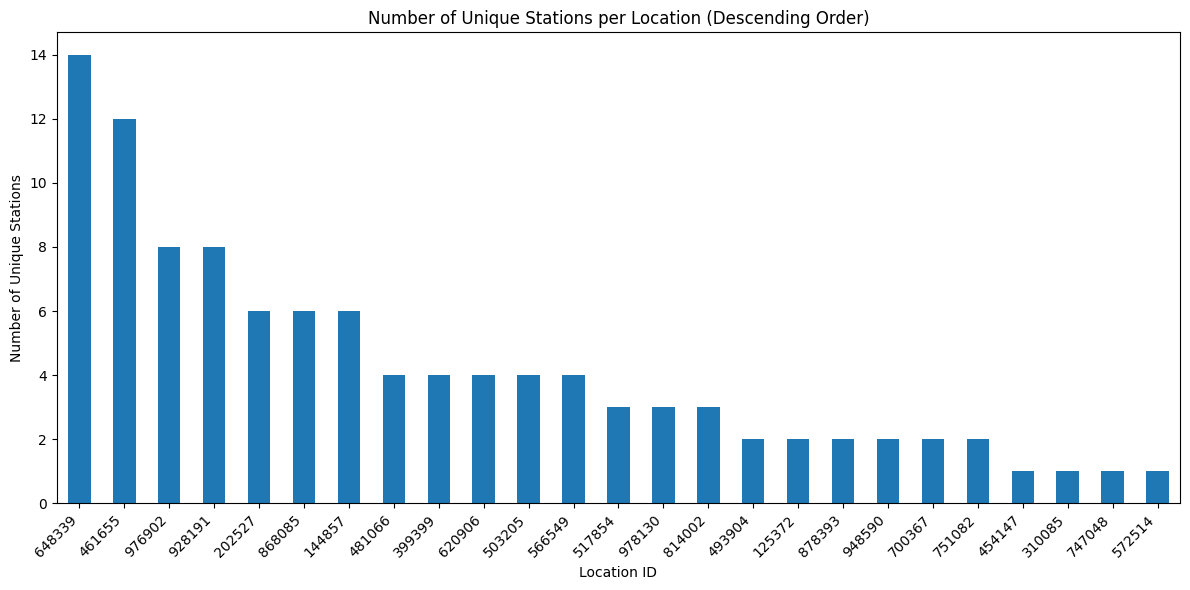

In [34]:
# prompt: Plot Group by locationId and count the number of unique stationIdnin decending order

import matplotlib.pyplot as plt

# Assuming 'location_station_counts' is already calculated as in your provided code

# Plotting the grouped data
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
location_station_counts.plot(kind='bar')
plt.title('Number of Unique Stations per Location (Descending Order)')
plt.xlabel('Location ID')
plt.ylabel('Number of Unique Stations')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## Review of User Statistics by LocationID

In [35]:
# prompt: Group by locationId and count the number of unique userId decending order

# Group by locationId and count the number of unique userId
location_user_counts = df.groupby('locationId')['userId'].nunique().sort_values(ascending=False)

location_user_counts

,userId
locationId,
461655,16
976902,15
868085,14
566549,13
503205,12
202527,11
928191,9
648339,8
493904,7


In [36]:
# prompt: create a dataframe called df_userID from all the unique value in df['userId']

df_userID = pd.DataFrame({'userId': df['userId'].unique()})

In [37]:
# prompt: convert the values of df_userID to integer

# Convert the 'userId' column to integers, handling potential errors
df_userID['userId'] = pd.to_numeric(df_userID['userId'], errors='coerce').astype('Int64')

In [38]:
len(df_userID)

85

## Review of Charge Sessions by LocationID

In [39]:
# prompt: Group by locationId and count the number of unique sessionId decending order

# Group by locationId and count the number of unique sessionId
location_session_counts = df.groupby('locationId')['sessionId'].nunique().sort_values(ascending=False)

location_session_counts

,sessionId
locationId,
493904,524
976902,401
461655,393
868085,294
481066,276
928191,235
144857,181
503205,168
566549,158


In [40]:
# prompt: Group by locationId  and count of  unique sessionId decending orderand count the number of unique stationid decending order and count the number of unique userId decending order and sum of  kwhTotal descending order

# Group by locationId and aggregate the data
grouped_data = df.groupby('locationId').agg(
    unique_sessions=('sessionId', 'nunique'),
    unique_stations=('stationId', 'nunique'),
    unique_users=('userId', 'nunique'),
    total_kwh=('kwhTotal', 'sum')
)

# Sort the results
sorted_data = grouped_data.sort_values(
    by=['unique_sessions', 'unique_stations', 'unique_users', 'total_kwh'],
    ascending=[False, False, False, False]
)

sorted_data

,unique_sessions,unique_stations,unique_users,total_kwh
locationId,,,,
493904,524,2,7,2805.86
976902,401,8,15,2572.93
461655,393,12,16,2096.62
868085,294,6,14,1948.03
481066,276,4,5,1658.65
928191,235,8,9,1083.76
144857,181,6,5,1010.98
503205,168,4,12,983.77
566549,158,4,13,753.23


## Review of Energy & Charge time

In [41]:
#describe data
df[['kwhTotal','chargeTimeHrs']].describe()

,kwhTotal,chargeTimeHrs
count,3395.000000,3395.000000
mean,5.809629,2.841488
std,2.892727,1.507472
min,0.000000,0.012500
25%,4.350000,2.110278
50%,6.230000,2.808889
75%,6.830000,3.544167
max,23.680000,55.238056


**Conclusion**

As this Data is old, the charge times are considerable larger that the current EV fast charger times.

In [42]:
# prompt: Group by locationId and sum of  kwhTotal decending order

# Group by locationId and sum kwhTotal, then sort in descending order
kwh_by_location = df.groupby('locationId')['kwhTotal'].sum().sort_values(ascending=False)
kwh_by_location

,kwhTotal
locationId,
493904,2805.86
976902,2572.93
461655,2096.62
868085,1948.03
481066,1658.65
928191,1083.76
144857,1010.98
503205,983.77
566549,753.23


## EV Charge 24hr Session Time Dimension Analysis

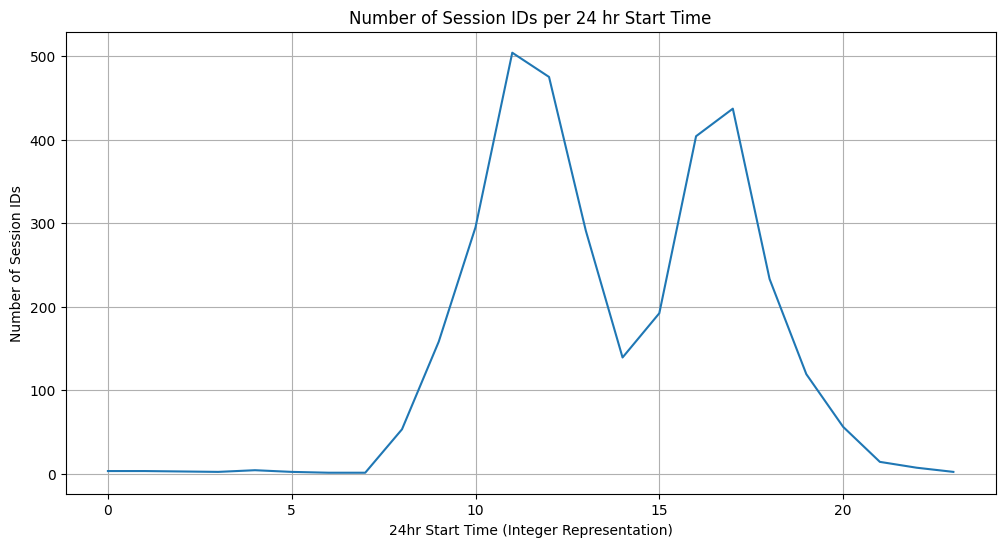

In [43]:
# prompt: Convert startTime to integer and Plot the number of sessionId per startTime

# Convert 'startTime' to datetime objects if it's not already
df['startTime_int'] = df['startTime'].astype(int) # create a new column named startTime_int to hold the converted values from the startTime column.



# Group by the integer representation of startTime and count the number of sessionIds
session_counts_per_start_time = df.groupby('startTime_int')['sessionId'].count()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(session_counts_per_start_time.index, session_counts_per_start_time.values)
plt.xlabel('24hr Start Time (Integer Representation)')
plt.ylabel('Number of Session IDs')
plt.title('Number of Session IDs per 24 hr Start Time')
plt.grid(True)
plt.show()

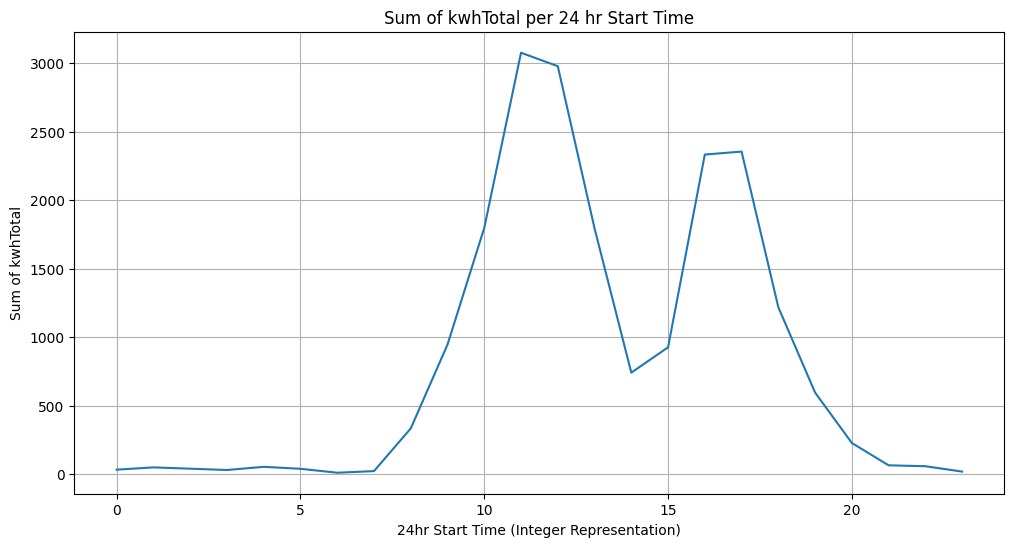

In [44]:
# prompt: Convert startTime to integer and Plot the sum of kwhTotal per startTime

# Convert 'startTime' to datetime objects if it's not already
df['startTime_int'] = pd.to_numeric(df['startTime'], errors='coerce').fillna(0).astype(int)

# Group by the integer representation of startTime and sum kwhTotal
kwh_per_start_time = df.groupby('startTime_int')['kwhTotal'].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(kwh_per_start_time.index, kwh_per_start_time.values)
plt.xlabel('24hr Start Time (Integer Representation)')
plt.ylabel('Sum of kwhTotal')
plt.title('Sum of kwhTotal per 24 hr Start Time')
plt.grid(True)
plt.show()

## Power Consumption by EV for each Charging Event

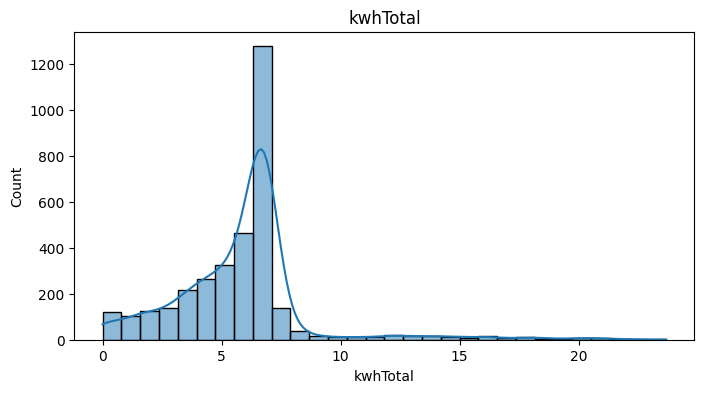

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

#Distribution of Energy Consumed kwhTotal

plt.figure(figsize=(8,4))
sns.histplot(df["kwhTotal"], bins = 30, kde = True)
plt.title("kwhTotal")
plt.show()

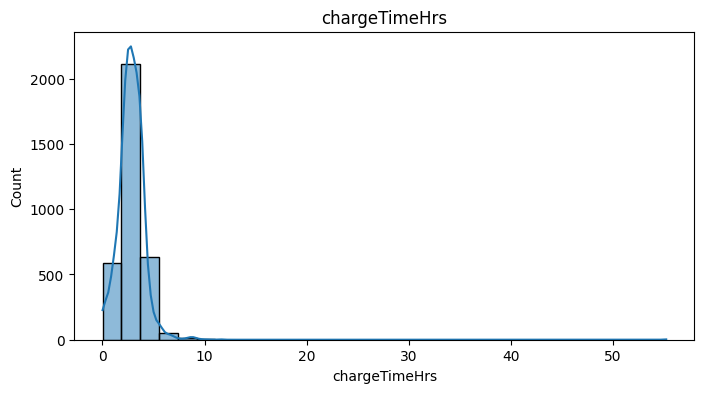

In [46]:
#Distribution of chargeTimeHrs

plt.figure(figsize=(8,4))
sns.histplot(df["chargeTimeHrs"], bins = 30, kde = True)
plt.title("chargeTimeHrs")
plt.show()

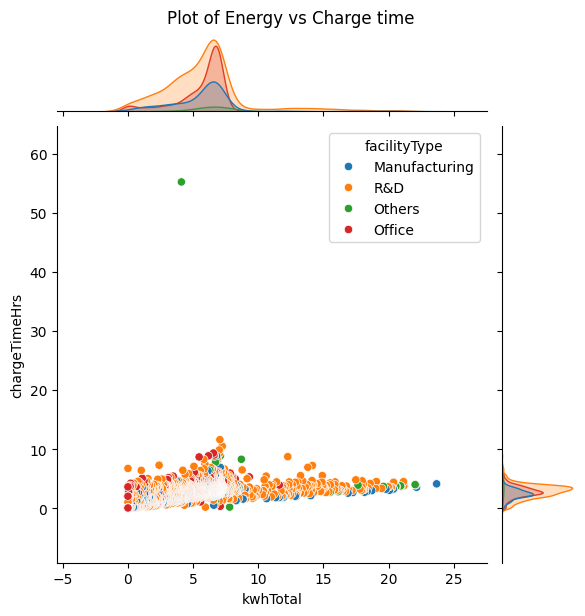

In [47]:
sns.jointplot(data=df, x='kwhTotal', y='chargeTimeHrs', hue = 'facilityType' ) # Removed the extra parenthesis from 'chargeTimeHrs)'
plt.suptitle(f'Plot of Energy vs Charge time', y=1.02)
plt.show()

In [48]:
df.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,startTime_int
0,4926737,23.68,0.5,0015-10-03 07:18:43,0015-10-03 11:25:07,7,11,4.106667,Sat,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,7
1,3738844,22.14,0.0,0015-08-01 05:29:02,0015-08-01 09:00:08,5,9,3.518333,Sat,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,5
2,2682332,22.07,0.0,0015-09-02 13:43:27,0015-09-02 17:38:10,13,17,3.911944,Wed,android,NaN,78908148,995505,868085,0,R&D,0,0,1,0,0,0,0,0,13
3,9025610,22.03,0.0,0015-05-29 16:55:35,0015-05-29 20:54:06,16,20,3.975278,Fri,android,NaN,78908148,863084,751082,0,Others,0,0,0,0,1,0,0,0,16
4,4473237,21.20,0.0,0015-09-30 16:52:49,0015-09-30 20:42:06,16,20,3.821389,Wed,android,NaN,78908148,664306,868085,0,R&D,0,0,1,0,0,0,0,0,16


# STATION DATA LOCALISATION TO MELBOURBNE VICTOIRA

Use the following mapping tool to obtain some proximity data ( 20km radius) in relation to CBD Post code 3000

https://www.freemaptools.com/find-australian-postcodes-inside-radius.htm#google_vignette

Generate a csv with the data.

## Load postcode Data and calculate distance to CBD

In [49]:
#load dataset csv from https://www.freemaptools.com/find-australian-postcodes-inside-radius.htm#google_vignette
df3= pd.read_csv('Melbourne_PostCodes_Data.csv')

In [50]:
df3.head(20)

,"postcode, suburb, distance"
0,"3000,Melbourne,0.00"
1,"3003,West Melbourne,0.96"
2,"3005,World Trade Centre,0.95"
3,"3006,South Wharf,0.97"
4,"3008,Docklands,0.82"
5,"8012,Docklands,0.82"
6,"3006,Southbank,1.03"
7,"3050,Royal Melbourne Hospital,1.91"
8,"3053,Carlton,1.74"
9,"3053,Carlton South,1.74"


In [51]:
# prompt: split the dataframe df3 on comma separator into a new df4 with columns postcode, suburb and distance

# Access the first column (which likely contains the data) by index (0)
df4 = df3.iloc[:, 0].str.split(',', expand=True)
df4.columns = ['postcode', 'suburb', 'distance']

In [52]:
# prompt: for each unique postcodes calculate the mean distance and sort by mean distance in ascending order

# Assuming df4 is the DataFrame with 'postcode' and 'distance' columns as created in your provided code.
# Convert the 'distance' column to numeric, handling potential errors
df4['distance'] = pd.to_numeric(df4['distance'], errors='coerce')

# Group by postcode and calculate the mean distance
mean_distances = df4.groupby('postcode')['distance'].mean()

# Sort by mean distance in ascending order
sorted_mean_distances = mean_distances.sort_values(ascending=True)

sorted_mean_distances.head(25)

,distance
postcode,
3000,0.00000
3008,0.82000
8012,0.82000
3005,0.95000
3003,0.96000
3006,1.00000
3205,1.59000
3053,1.74000
3050,1.91000


In [53]:
# prompt: convert mean distance to a dataframe called postcode_distance

postcode_distance = pd.DataFrame({'postcode': sorted_mean_distances.index, 'mean_distance': sorted_mean_distances.values})
postcode_distance

,postcode,mean_distance
0,3000,0.000
1,3008,0.820
2,8012,0.820
3,3005,0.950
4,3003,0.960
...,...,...
359,3992,97.640
360,3662,97.845
361,3321,99.030
362,3822,99.750


In [54]:
# prompt: print the  unique_location_count and unique_station_count

print(f"The number of unique location IDs is: {unique_location_count}")
print(f"The number of unique station IDs is: {unique_station_count}")

The number of unique location IDs is: 25
The number of unique station IDs is: 105


## Load cleaned Station Data

In [55]:
#load dataset
df3= pd.read_csv('Melbourne_PostCodes_Data.csv')

In [56]:
#load dataset
df5= pd.read_csv('Cleaned_Australian_EV_Charging_Stations.csv')

In [57]:
df5.head(2)

,Station_no,Location Name,Latitude,Longitude,Town,Postal Code,City,Address,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_J-1772,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,Power 1,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets
0,0,Chargefox Charging Station,-35.726720,145.659354,Cobram,2714,N.A,154 Campbell Rd,1.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,82,Evie Charging Station,-35.940484,144.725516,Echuca,2731,N.A,438 High St,0.0,NaN,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0


In [58]:
# prompt: from df5 remove rows with Postal Code = N.A and remove rows with Postal Code < 3000 and remove rows with Postal Code > 3999

# Assuming df5 is already loaded as in your provided code.
# Filter out rows where 'Postal Code' is 'N.A'
df5 = df5[df5['Postal Code'] != 'N.A']

# Convert 'Postal Code' to numeric, handling errors
df5['Postal Code'] = pd.to_numeric(df5['Postal Code'], errors='coerce')

# Filter out rows where 'Postal Code' is less than 3000 or greater than 3999
df5 = df5[(df5['Postal Code'] >= 3000) & (df5['Postal Code'] <= 3999)]

In [59]:
df5.tail(5)

,Station_no,Location Name,Latitude,Longitude,Town,Postal Code,City,Address,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_J-1772,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,Power 1,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets
336,210,Sorrento Community Centre,-38.338118,144.737278,N.A,3943,Melbourne,"860 Melbourne Rd, Sorrento VIC 3943, Australia",NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,5,20,0,6
337,390,Sorrento Hotel,-38.338316,144.743447,N.A,3943,Melbourne,"1 Esplanade, Sorrento VIC 3943, Australia",0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,NaN,1.0,1,0,7,20,0,6
338,300,Cranbourne West Community Hub (Coming Soon),-38.106929,145.250522,N.A,3977,Melbourne,"75 Evans Rd, Cranbourne West VIC 3977, Australia",2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,2.0,1,0,10,20,1,5
339,308,Cranbourne Home (Out Of Service),-38.087041,145.279599,N.A,3977,Melbourne,"2 Lesdon Ave, Cranbourne VIC 3977, Australia",2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,22.0,2.0,1,0,4,20,3,5
340,120,Club Delaray,-38.110037,145.336394,N.A,3978,Melbourne,"20 Alphey Road, Clyde North VIC 3978, Australia",1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,1.0,1,0,20,7,1,2


In [60]:
# prompt: for every row of df5, using the integer value of df5['Postal Code'] , find the corresponding integer value from datafame df4[postcode] and add then add the value of df4[distance] to df5[cbd_distance], where df5[cbd_distance] is a new column

# Create the 'cbd_distance' column in df5 and initialize it to 0
df5['cbd_distance'] = 0

# Iterate through rows of df5
for index, row in df5.iterrows():
  try:
    # Find the corresponding row in df4 based on 'Postal Code'
    postal_code = int(row['Postal Code'])
    matching_row = df4[df4['postcode'] == str(postal_code)]

    # If a match is found, add the 'distance' to 'cbd_distance' in df5
    if not matching_row.empty:
      df5.loc[index, 'cbd_distance'] = matching_row['distance'].iloc[0]
  except (ValueError, KeyError):
    # Handle cases where 'Postal Code' is not an integer or not found in df4
    print(f"Error processing row {index}: Invalid Postal Code or not found in df4")
    # You might want to set a default value or skip the row based on your needs



<ipython-input-60-f73cefbf5930>:15: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.24' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [61]:
df5.head(5)

,Station_no,Location Name,Latitude,Longitude,Town,Postal Code,City,Address,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_J-1772,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,Power 1,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets,cbd_distance
2,2,Lonsdale St,-37.813437,144.955934,N.A,3000,Melbourne,"535 Little Lonsdale St, Melbourne VIC 3004, Au...",0.0,0.0,0.0,0.0,2.0,0,0.0,0.0,NaN,2.0,20,2,18,20,20,20,0.0
3,22,Bourke St,-37.814779,144.956447,N.A,3000,Melbourne,"542 Little Bourke St, Melbourne VIC 3000, Aust...",0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,NaN,1.0,20,3,20,20,20,20,0.0
4,34,Secure Parking (450 Flinders Lane),-37.818758,144.958866,N.A,3000,Melbourne,"450 Flinders Ln, Melbourne VIC 3000, Australia",10.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,10.0,20,4,16,20,20,20,0.0
5,42,Hyatt Centric Melbourne,-37.820407,144.955802,N.A,3000,Melbourne,"25 Downie St, Melbourne VIC 3000, Australia",2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,2.0,20,3,17,20,20,20,0.0
6,55,Wilson Parking,-37.811294,144.967823,N.A,3000,Melbourne,"222 Russell St, Melbourne VIC 3000, Australia",2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,11.0,2.0,17,7,20,20,20,20,0.0


In [62]:
# prompt: for every row of df5, add a column to df5 called ChargingPoints that is the sum of Plugs_Type2 + Plugs_Three_Phase + Plugs_CHAdeMO + Plugs_CCS/SAE + Plugs_Tesla

# Assuming df5 is already loaded and processed as in the provided code.

# Fill NaN values in relevant columns with 0
for col in ['Plugs_Type2', 'Plugs_Three_Phase', 'Plugs_CHAdeMO', 'Plugs_CCS/SAE', 'Plugs_Tesla']:
    df5[col] = df5[col].fillna(0)

# Calculate 'ChargingPoints' for each row
df5['ChargingPoints'] = df5['Plugs_Type2'] + df5['Plugs_Three_Phase'] + df5['Plugs_CHAdeMO'] + df5['Plugs_CCS/SAE'] + df5['Plugs_Tesla']

In [63]:
# prompt: for cbd_distance < 10 count the unique Station_no

# Assuming df5 is already loaded and processed as in the provided code.

# Filter for cbd_distance < 10
filtered_df = df5[df5['cbd_distance'] < 10]

# Count unique Station_no (assuming 'Station_no' is a column name)
unique_station_count = filtered_df['Station_no'].nunique()

print(f"Number of unique stations with cbd_distance < 10: {unique_station_count}")

Number of unique stations with cbd_distance < 10: 141


In [64]:
# prompt: list count the unique Station_no descending for Postal Code and cbd_distance

# Assuming df5 is already loaded and processed as in the provided code.

# Group by 'Postal Code' and 'cbd_distance', then count unique 'Station_no'
station_counts = df5.groupby(['Postal Code', 'cbd_distance'])['Station_no'].nunique().sort_values(ascending=False)

station_counts

,,Station_no
Postal Code,cbd_distance,
3000,0.00,40
3207,3.78,11
3205,1.59,7
3121,4.01,7
3931,46.59,6
...,...,...
3178,27.69,1
3179,24.97,1
3162,10.16,1


In [65]:
# prompt: sort df5 in ascending order base on column cbd_distance

# Sort df5 in ascending order based on the 'cbd_distance' column
df5_sorted = df5.sort_values(by='cbd_distance', ascending=True)
df5_sorted.head()

,Station_no,Location Name,Latitude,Longitude,Town,Postal Code,City,Address,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_J-1772,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,Power 1,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets,cbd_distance,ChargingPoints
282,370,Electric Vehicle Charging Station,-36.385785,145.396965,Shepparton,3630,Shepparton,530 Wyndham St,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2,5,13,20,18,17,0.0,1.0
24,227,Downie St,-37.820203,144.955565,N.A,3000,Melbourne,"25 Downie St, Melbourne VIC 3000, Australia",2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,2.0,20,3,18,20,20,20,0.0,2.0
23,219,Secure Parking (Southern Cross),-37.812452,144.969535,N.A,3000,Melbourne,"129 Bourke St, Melbourne VIC 3000, Australia",0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,NaN,2.0,17,9,18,20,20,20,0.0,0.0
22,214,Secure Parking - 460 Lonsdale Street Car Park,-37.813049,144.958347,N.A,3000,Melbourne,"460 Lonsdale St, Melbourne VIC 3000, Australia",0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,NaN,1.0,20,3,17,20,20,20,0.0,0.0
21,205,Wilson Parking,-37.814781,144.956451,N.A,3000,Melbourne,"542 Little Bourke St, Melbourne VIC 3000, Aust...",0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,NaN,1.0,20,3,20,20,20,20,0.0,0.0


In [66]:
# prompt: remove from df5 rows with ChargingPoints=0

# Assuming df5 is already loaded and processed as in the provided code.

# Remove rows where 'ChargingPoints' is equal to 0
df5 = df5[df5['ChargingPoints'] != 0]
df5.tail()

,Station_no,Location Name,Latitude,Longitude,Town,Postal Code,City,Address,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_J-1772,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,Power 1,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets,cbd_distance,ChargingPoints
334,3,Sorrento Community Centre,-38.338560,144.737043,N.A,3943,Melbourne,"860 Melbourne Rd, Sorrento VIC 3943, Australia",0.0,0.0,4.0,4.0,0.0,0,0.0,0.0,50.065,8.0,1,0,5,20,0,6,61.73,8.0
336,210,Sorrento Community Centre,-38.338118,144.737278,N.A,3943,Melbourne,"860 Melbourne Rd, Sorrento VIC 3943, Australia",0.0,0.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,1,0,5,20,0,6,61.73,4.0
338,300,Cranbourne West Community Hub (Coming Soon),-38.106929,145.250522,N.A,3977,Melbourne,"75 Evans Rd, Cranbourne West VIC 3977, Australia",2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,2.0,1,0,10,20,1,5,36.80,2.0
339,308,Cranbourne Home (Out Of Service),-38.087041,145.279599,N.A,3977,Melbourne,"2 Lesdon Ave, Cranbourne VIC 3977, Australia",2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,22.000,2.0,1,0,4,20,3,5,36.80,2.0
340,120,Club Delaray,-38.110037,145.336394,N.A,3978,Melbourne,"20 Alphey Road, Clyde North VIC 3978, Australia",1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,1.0,1,0,20,7,1,2,51.51,1.0


In [67]:
# prompt: remove from df5 rows with ChargingPoints= NaN

# Assuming df5 is already loaded and processed as in the provided code.

# Remove rows where 'ChargingPoints' is NaN
df5 = df5.dropna(subset=['ChargingPoints'])
df5.tail()

,Station_no,Location Name,Latitude,Longitude,Town,Postal Code,City,Address,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_J-1772,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,Power 1,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets,cbd_distance,ChargingPoints
334,3,Sorrento Community Centre,-38.338560,144.737043,N.A,3943,Melbourne,"860 Melbourne Rd, Sorrento VIC 3943, Australia",0.0,0.0,4.0,4.0,0.0,0,0.0,0.0,50.065,8.0,1,0,5,20,0,6,61.73,8.0
336,210,Sorrento Community Centre,-38.338118,144.737278,N.A,3943,Melbourne,"860 Melbourne Rd, Sorrento VIC 3943, Australia",0.0,0.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,1,0,5,20,0,6,61.73,4.0
338,300,Cranbourne West Community Hub (Coming Soon),-38.106929,145.250522,N.A,3977,Melbourne,"75 Evans Rd, Cranbourne West VIC 3977, Australia",2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,2.0,1,0,10,20,1,5,36.80,2.0
339,308,Cranbourne Home (Out Of Service),-38.087041,145.279599,N.A,3977,Melbourne,"2 Lesdon Ave, Cranbourne VIC 3977, Australia",2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,22.000,2.0,1,0,4,20,3,5,36.80,2.0
340,120,Club Delaray,-38.110037,145.336394,N.A,3978,Melbourne,"20 Alphey Road, Clyde North VIC 3978, Australia",1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,1.0,1,0,20,7,1,2,51.51,1.0


##Merge the Station Data & Postcode Data

In [68]:
# count numner of unique stationId in df ( the original data)
unique_station_count = len(df_all_station_ids)
print(f"The number of unique station IDs is: {unique_station_count}")

The number of unique station IDs is: 105


In [69]:
# prompt: truncate df5 to the length of unique_station_count

# Assuming unique_station_count is already defined and df5 is your DataFrame

df5 = df5.head(unique_station_count)
df5.tail(5)

,Station_no,Location Name,Latitude,Longitude,Town,Postal Code,City,Address,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_J-1772,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,Power 1,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets,cbd_distance,ChargingPoints
131,217,Uni Hill Town Centre,-37.682471,145.071000,N.A,3082,Melbourne,"Shop 17/5 Janefield Dr, Bundoora VIC 3083, Aus...",0.0,0.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,3,1,12,20,4,2,19.48,4.0
132,270,Uni Hill Town Centre,-37.683069,145.071032,N.A,3082,Melbourne,"Shop 17/5 Janefield Dr, Bundoora VIC 3083, Aus...",0.0,0.0,4.0,4.0,0.0,0,0.0,0.0,50.0,8.0,3,1,12,20,4,3,19.48,8.0
134,66,Woolworths Heidelberg,-37.758997,145.068632,N.A,3084,Melbourne,"451 Lower Heidelberg Rd, Heidelberg VIC 3084, ...",16.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,16.0,2,4,17,20,2,7,13.72,16.0
135,169,Baptcare Strathalan,-37.728819,145.077998,N.A,3084,Melbourne,"2-34 Erskine Rd, Macleod VIC 3085, Australia",2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,2.0,1,0,3,12,1,1,13.72,2.0
136,61,Greensborough Plaza,-37.702301,145.102344,N.A,3088,Melbourne,"25 Main St, Greensborough VIC 3088, Australia",4.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,4.0,2,2,14,20,6,7,18.64,4.0


In [70]:
#Chech the number of stationsID
len(df5), unique_station_count

(105, 105)

In [71]:
# prompt: add df_all_station_ids as a column in df5 name stationID

df5['stationID'] = df_all_station_ids['station_id'].values[:len(df5)]
df5.head()

,Station_no,Location Name,Latitude,Longitude,Town,Postal Code,City,Address,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_J-1772,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,Power 1,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets,cbd_distance,ChargingPoints,stationID
2,2,Lonsdale St,-37.813437,144.955934,N.A,3000,Melbourne,"535 Little Lonsdale St, Melbourne VIC 3004, Au...",0.0,0.0,0.0,0.0,2.0,0,0.0,0.0,NaN,2.0,20,2,18,20,20,20,0.0,2.0,488364
4,34,Secure Parking (450 Flinders Lane),-37.818758,144.958866,N.A,3000,Melbourne,"450 Flinders Ln, Melbourne VIC 3000, Australia",10.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,10.0,20,4,16,20,20,20,0.0,10.0,540225
5,42,Hyatt Centric Melbourne,-37.820407,144.955802,N.A,3000,Melbourne,"25 Downie St, Melbourne VIC 3000, Australia",2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,2.0,20,3,17,20,20,20,0.0,2.0,914305
6,55,Wilson Parking,-37.811294,144.967823,N.A,3000,Melbourne,"222 Russell St, Melbourne VIC 3000, Australia",2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,11.0,2.0,17,7,20,20,20,20,0.0,2.0,884707
7,71,Alto Hotel,-37.816254,144.954636,N.A,3000,Melbourne,"636 Bourke St, Melbourne VIC 3000, Australia",0.0,1.0,0.0,0.0,3.0,1,0.0,2.0,NaN,7.0,20,2,20,20,20,20,0.0,4.0,922416


In [72]:
# prompt: list the unique stations in df5[stationID]

unique_stations = df5['stationID'].unique()
unique_stations

array([488364, 540225, 914305, 884707, 922416, 787792, 914907, 481613,
       864630, 451479, 286084, 587514, 988981, 926676, 920264, 569889,
       878706, 549414, 582873, 371335, 129465, 594591, 612116, 431796,
       943765, 632920, 944515, 405157, 250527, 280221, 500856, 738900,
       801274, 355208, 944575, 207262, 711566, 728918, 236379, 425476,
       256233, 894409, 507660, 672450, 792421, 911231, 260781, 200695,
       995505, 664306, 932939, 638536, 489543, 569886, 572249, 951880,
       803398, 517464, 568071, 891421, 474204, 260408, 191826, 562656,
       758780, 280415, 404112, 946482, 236840, 989457, 623134, 134427,
       653450, 228137, 349635, 693651, 514669, 902592, 414088, 131897,
       643012, 782629, 729642, 987396, 366832, 288445, 386940, 874950,
       219054, 369001, 955429, 445920, 871619, 730023, 265601, 237105,
       575971, 616125, 818217, 863084, 929628, 861532, 300866, 875343,
       981639])

In [73]:
# prompt: delete column df5[locationID]

# Assuming df5 is already defined as in your provided code.

# Delete the 'locationID' column if it exists
if 'locationID' in df5.columns:
    del df5['locationID']

In [74]:
# prompt: create a column df5[locationID}. for each row of df5[stationID] find the corresponding locationID from station_id_by_location.items() and add it its integer value to  df5[locationID]

# Assuming df5 and station_id_by_location are defined as in your provided code.

# Create an empty list to store location IDs
location_ids = []

# Iterate through station IDs in df5
for station_id in df5['stationID']:
  found_location = False
  # Search for the station ID in the station_id_by_location dictionary
  for location, station_list in station_id_by_location.items():
    if station_id in station_list:
      location_ids.append(location)
      found_location = True
      break  # Exit the inner loop once a match is found
  if not found_location:
    location_ids.append(0)  # Append 0 if no match is found

# Add the location IDs as a new column in df5
df5['locationID'] = location_ids

In [75]:
# prompt: list the  uniue value in df5[locatioID]

unique_location_ids = df5['locationID'].unique()
unique_location_ids, len (unique_location_ids)

(array([648339, 461655, 976902, 928191, 202527, 868085, 144857, 481066,
        399399, 620906, 503205, 566549, 517854, 978130, 814002, 493904,
        125372, 878393, 948590, 700367, 751082, 454147, 310085, 747048,
        572514]),
 25)

In [76]:
df5.head(2)

,Station_no,Location Name,Latitude,Longitude,Town,Postal Code,City,Address,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_J-1772,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,Power 1,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets,cbd_distance,ChargingPoints,stationID,locationID
2,2,Lonsdale St,-37.813437,144.955934,N.A,3000,Melbourne,"535 Little Lonsdale St, Melbourne VIC 3004, Au...",0.0,0.0,0.0,0.0,2.0,0,0.0,0.0,NaN,2.0,20,2,18,20,20,20,0.0,2.0,488364,648339
4,34,Secure Parking (450 Flinders Lane),-37.818758,144.958866,N.A,3000,Melbourne,"450 Flinders Ln, Melbourne VIC 3000, Australia",10.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,10.0,20,4,16,20,20,20,0.0,10.0,540225,648339


In [77]:
# prompt: change the name of df5[Power 1] to df5[PowerOutput]

df5 = df5.rename(columns={'Power 1': 'PowerOutput'})

In [78]:
# prompt: create a new column called df5[Amenities] and for each row randomly select a number of amenities from the following list [Coffee, Dining, Restrooms, Shopping, Grocery, WiFi, Valet Parking, Car Cleaning]

import random

amenities_list = ['Coffee', 'Dining', 'Restrooms', 'Shopping', 'Grocery', 'WiFi', 'Valet Parking', 'Car Cleaning']

# Function to randomly select amenities
def random_amenities(n):
  num_amenities = random.randint(1, len(amenities_list))  # Select 1 to all amenities
  selected_amenities = random.sample(amenities_list, num_amenities)
  return ', '.join(selected_amenities)

# Apply the function to create the new column
df5['Amenities'] = [random_amenities(i) for i in range(len(df5))]

In [79]:
df5.head(2)

,Station_no,Location Name,Latitude,Longitude,Town,Postal Code,City,Address,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_J-1772,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,PowerOutput,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets,cbd_distance,ChargingPoints,stationID,locationID,Amenities
2,2,Lonsdale St,-37.813437,144.955934,N.A,3000,Melbourne,"535 Little Lonsdale St, Melbourne VIC 3004, Au...",0.0,0.0,0.0,0.0,2.0,0,0.0,0.0,NaN,2.0,20,2,18,20,20,20,0.0,2.0,488364,648339,"Shopping, Dining, Grocery, Valet Parking"
4,34,Secure Parking (450 Flinders Lane),-37.818758,144.958866,N.A,3000,Melbourne,"450 Flinders Ln, Melbourne VIC 3000, Australia",10.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,10.0,20,4,16,20,20,20,0.0,10.0,540225,648339,"Car Cleaning, Shopping, Valet Parking, Dining,..."


# CURRENT EV VECHICLES

Data on electric vehicles can be obtained from:

https://www.aaa.asn.au/research-data/electric-vehicle/

In [80]:
#load dataset
df2= pd.read_csv('Vehicle-Specifications-Sep24.csv')

## Exporatory Analysis

In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   VEHICLE TYPE                107 non-null    object 
 1   FUEL TYPE                   107 non-null    object 
 2   MODEL                       107 non-null    object 
 3   VARIANT DETAILS             107 non-null    object 
 4   LISTED PRICE ($AUD)         97 non-null     object 
 5   FAST CHARGE TIME (minutes)  80 non-null     object 
 6   ANCAP RATING                107 non-null    object 
 7   RANGE (km)                  92 non-null     float64
 8   ENERGY CONSUMPTION          92 non-null     float64
dtypes: float64(2), object(7)
memory usage: 7.6+ KB


In [82]:
df2.head(5)

,VEHICLE TYPE,FUEL TYPE,MODEL,VARIANT DETAILS,LISTED PRICE ($AUD),FAST CHARGE TIME (minutes),ANCAP RATING,RANGE (km),ENERGY CONSUMPTION
0,Large SUV,BEV,Audi e-tron,Audi e-tron 55 Auto quattro,NaN,"85 mins (5%-80% charge, 50kW charger)","5 star, 2019",459.0,23.2
1,Large Car,BEV,Audi e-tron GT,2024 Audi e-tron GT Auto e-quattro MY24,181784,"23 mins (5%-80% charge, 270kW charger)",Unrated,540.0,19.2
2,Large Car,BEV,BMW 5 Series BEV,2024 BMW i5 eDrive40 M Sport G60 Auto,155900,"30 mins (10%-80% charge, 205kW charger)","5 star, 2023",550.0,16.5
3,Medium Car,BEV,BMW i4,2024 BMW i4 eDrive35 M Sport G26 Auto,85900,"31 mins (10%-80% charge, 205kW charger)","4 star, 2022",520.0,22.2
4,Large Car,BEV,BMW i7,2024 BMW i7 xDrive60 M Sport G70 Auto AWD,306900,"34 mins (10%-80% charge, 195kW charger)",Unrated,625.0,22.2


### Manufacturers Analysis

In [83]:
# prompt: Create a new Manufacturer column in df2 by stripping the characters after the first space form the model column

# Assuming df2 is already loaded as shown in the provided code.

# Correct the split method call to not use str accessor directly.
df2['Manufacturer'] = df2['MODEL'].apply(lambda x: x.split(' ', 1)[0])

In [84]:
df2.tail(5)

,VEHICLE TYPE,FUEL TYPE,MODEL,VARIANT DETAILS,LISTED PRICE ($AUD),FAST CHARGE TIME (minutes),ANCAP RATING,RANGE (km),ENERGY CONSUMPTION,Manufacturer
102,Large Car,PHEV,Porsche Panamera PHEV,2024 Porsche Panamera 4 E-Hybrid 972 Auto AWD ...,268100,NaN,Unrated,56.0,19.5,Porsche
103,Large SUV,PHEV,Volkswagen Touareg PHEV,2024 Volkswagen Touareg R RC Auto 4MOTION MY24,129990,NaN,Unrated,51.0,21.1,Volkswagen
104,Medium Car,PHEV,Volvo S60 PHEV,2024 Volvo S60 Recharge T8 Black Edition Auto ...,NaN,"300 mins (full charge, 3.6kW charger)",Unrated,90.0,18.6,Volvo
105,Medium SUV,PHEV,Volvo XC60 PHEV,2024 Volvo XC60 Recharge Plus T8 Plug-In Hybri...,92390,"300 mins (recharge to 100%, 3.6kW charger)",Unrated,81.0,26.2,Volvo
106,Large SUV,PHEV,Volvo XC90 PHEV,2024 Volvo XC90 Recharge Ultimate T8 Plug-In H...,128390,"300 mins (recharge to 100%, 3.6kW charger)",Unrated,77.0,26.7,Volvo


### Drop NaN values

In [85]:
# prompt: remove rows where RANGE (km) or ENERGY CONSUMPTION or FAST CHARGE TIME (minutes) are Nan

# Drop rows with NaN values in specified columns from df2 (not df)
df2 = df2.dropna(subset=['RANGE (km)', 'ENERGY CONSUMPTION', 'FAST CHARGE TIME (minutes)'])

In [86]:
#display columns
df2.columns

Index(['VEHICLE TYPE', 'FUEL TYPE', 'MODEL', 'VARIANT DETAILS',
       'LISTED PRICE ($AUD)', 'FAST CHARGE TIME (minutes)', 'ANCAP RATING',
       'RANGE (km)', 'ENERGY CONSUMPTION', 'Manufacturer'],
      dtype='object')

### Calculate an estimate for the Battery capacity from the given parameters

Use the vehicle RANGE (KM) and the ENERGY CONSUMPTION (kWh/100km)

In [87]:
# prompt: Create a new Battery_capacity column by multiplying RANGE (km) by ENERGY CONSUMPTION by 1/100

# Assuming df2 is already loaded and processed as in the previous code.

df2['Battery_capacity_kW'] = df2['RANGE (km)'] * df2['ENERGY CONSUMPTION'] * (1/100)

<ipython-input-87-6a33ead56c10>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
df2.head(5)

,VEHICLE TYPE,FUEL TYPE,MODEL,VARIANT DETAILS,LISTED PRICE ($AUD),FAST CHARGE TIME (minutes),ANCAP RATING,RANGE (km),ENERGY CONSUMPTION,Manufacturer,Battery_capacity_kW
0,Large SUV,BEV,Audi e-tron,Audi e-tron 55 Auto quattro,NaN,"85 mins (5%-80% charge, 50kW charger)","5 star, 2019",459.0,23.2,Audi,106.488
1,Large Car,BEV,Audi e-tron GT,2024 Audi e-tron GT Auto e-quattro MY24,181784,"23 mins (5%-80% charge, 270kW charger)",Unrated,540.0,19.2,Audi,103.680
2,Large Car,BEV,BMW 5 Series BEV,2024 BMW i5 eDrive40 M Sport G60 Auto,155900,"30 mins (10%-80% charge, 205kW charger)","5 star, 2023",550.0,16.5,BMW,90.750
3,Medium Car,BEV,BMW i4,2024 BMW i4 eDrive35 M Sport G26 Auto,85900,"31 mins (10%-80% charge, 205kW charger)","4 star, 2022",520.0,22.2,BMW,115.440
4,Large Car,BEV,BMW i7,2024 BMW i7 xDrive60 M Sport G70 Auto AWD,306900,"34 mins (10%-80% charge, 195kW charger)",Unrated,625.0,22.2,BMW,138.750


### Remove Fuel types other that Battery Electric Vehicles

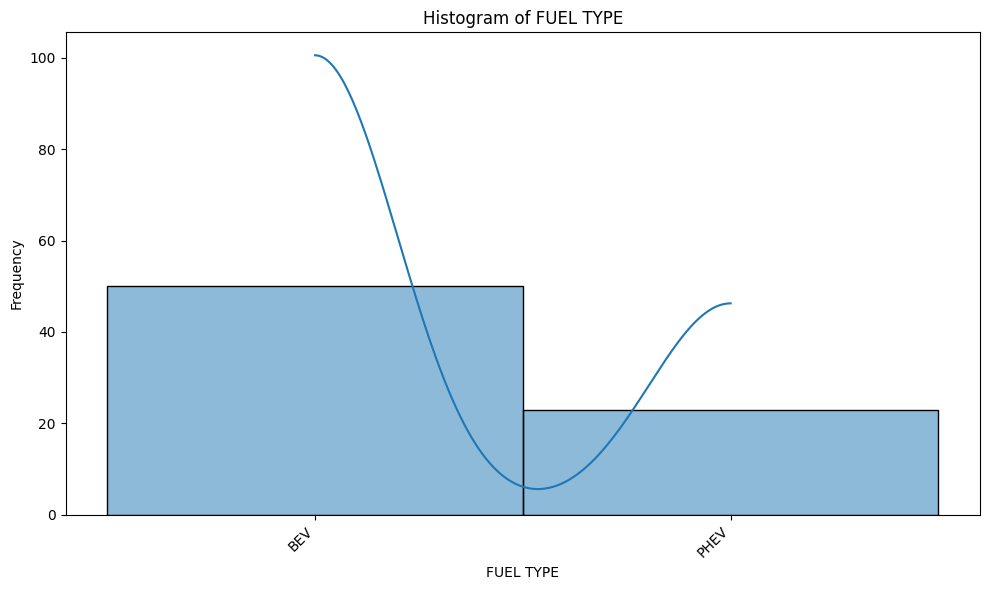

In [89]:
# prompt: Plot a histogram of FUEL TYPE

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df2 is already loaded and processed as in the previous code.

plt.figure(figsize=(10, 6))
sns.histplot(df2['FUEL TYPE'], bins=30, kde=True)
plt.title("Histogram of FUEL TYPE")
plt.xlabel("FUEL TYPE")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [90]:
# prompt: drop FUEL TYPE = PHEV from column FUEL TYPE

# Assuming df2 is already loaded and processed as in the previous code.

df2 = df2[df2['FUEL TYPE'] != 'PHEV']

### Review distribution of vehicle types or Classes

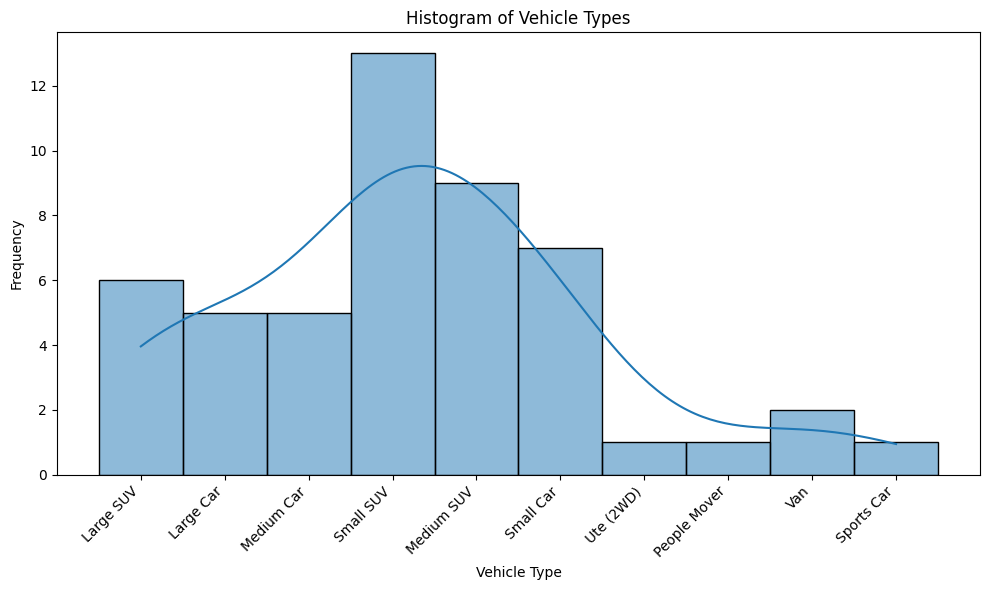

In [91]:
# prompt: Plot a histogram of VEHICLE TYPE

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df2 is already loaded and processed as in the previous code.

plt.figure(figsize=(10, 6))
sns.histplot(df2['VEHICLE TYPE'], bins=30, kde=True)
plt.title("Histogram of Vehicle Types")
plt.xlabel("Vehicle Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### Review Distribution of Vehicle Ranges

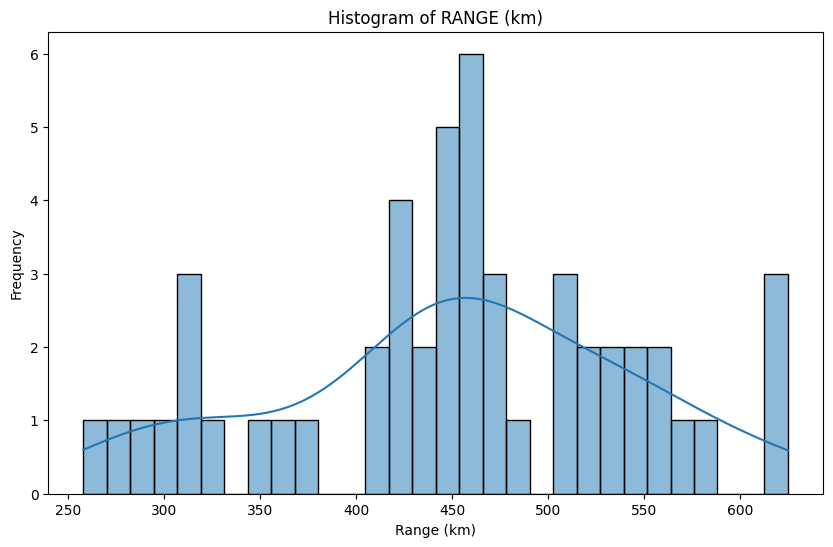

In [92]:
# prompt: Plot a histogram of RANGE (km)

# Assuming df2 is already loaded and processed as in the previous code.

plt.figure(figsize=(10, 6))
sns.histplot(df2['RANGE (km)'], bins=30, kde=True)
plt.title("Histogram of RANGE (km)")
plt.xlabel("Range (km)")
plt.ylabel("Frequency")
plt.show()

### Review of manufacturers & models

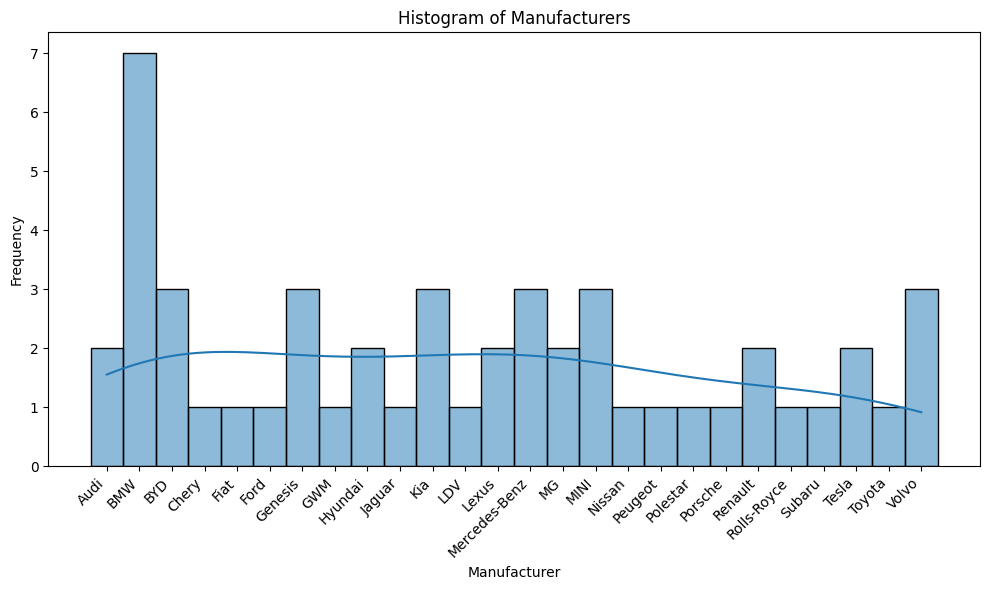

In [93]:
# prompt: Plot a histogram of Manufacturer

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df2 is already loaded and processed as in the previous code.

plt.figure(figsize=(10, 6))
sns.histplot(df2['Manufacturer'], bins=30, kde=True)
plt.title("Histogram of Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### Review of Vehicle Models Versus Range

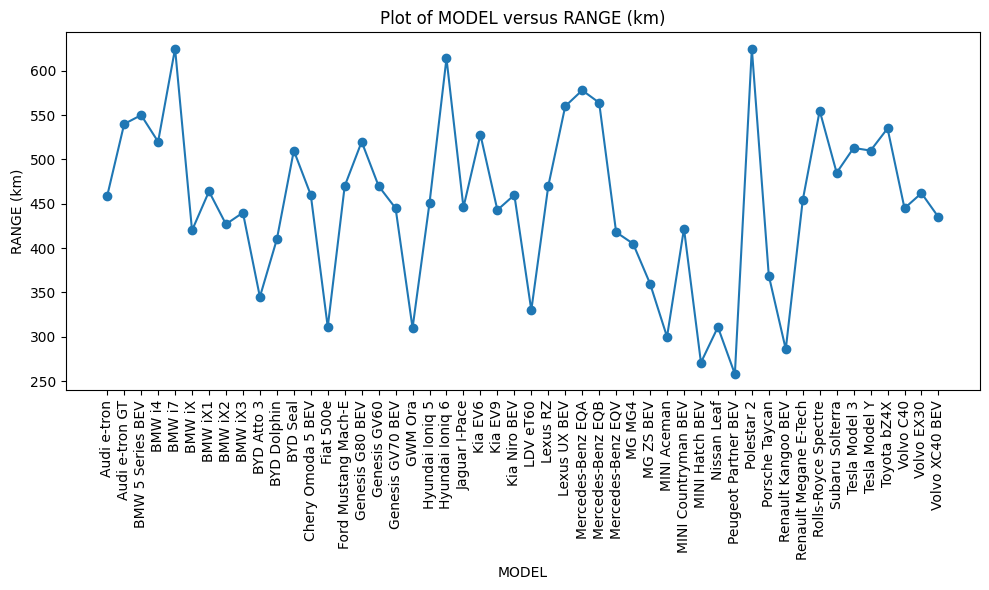

In [94]:
# prompt: Plot of   MODEL versus RANGE (km)

# Assuming df2 is already loaded and processed as in the previous code.

plt.figure(figsize=(10, 6))
plt.plot(df2['MODEL'], df2['RANGE (km)'], marker='o', linestyle='-')  # Create the plot
plt.xlabel("MODEL")
plt.ylabel("RANGE (km)")
plt.title("Plot of MODEL versus RANGE (km)")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### Boxplot of Vehicle Manufacturers versus range

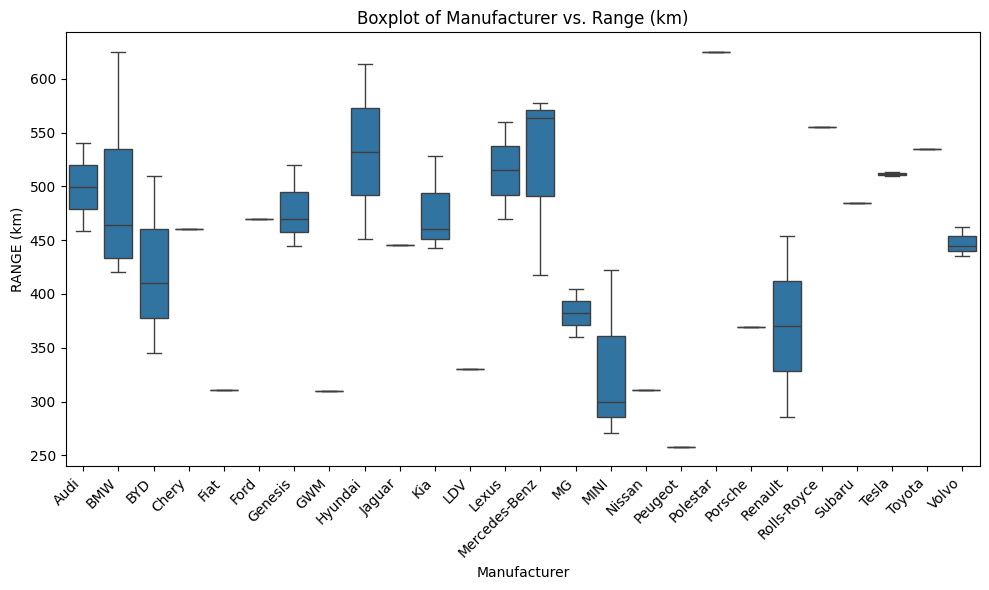

In [95]:
# prompt: Plot of  boxplot Manufacturer versus RANGE (km)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Manufacturer', y='RANGE (km)', data=df2)
plt.title('Boxplot of Manufacturer vs. Range (km)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Create an estimate of 80percent battery charge using a 50KW charger as a default value

In [96]:
# prompt: Create a new Est_Batt_Charge_Time_80perc50KW column by multiplying Battery_capacity_kW by 1/50 by 60 by 0.7
# Average is from 10% to 80%, 50kw is the most frequency station charger size.

df2['Est_Batt_Charge_Time_80perc50KW'] = df2['Battery_capacity_kW'] * (1/50) * 60 * 0.7

#### Box Plot of Estimated 80 percent vehicle charge with a 50KW Charger

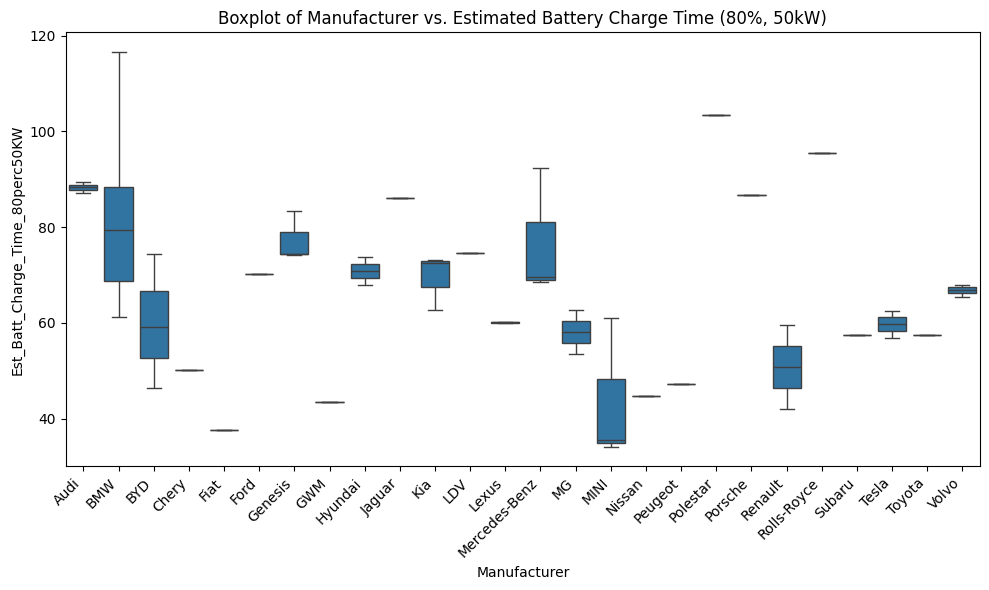

In [97]:
# prompt: Plot of  boxplot Manufacturer versus Est_Batt_Charge_Time_80perc50KW

plt.figure(figsize=(10, 6))
sns.boxplot(x='Manufacturer', y='Est_Batt_Charge_Time_80perc50KW', data=df2)
plt.title('Boxplot of Manufacturer vs. Estimated Battery Charge Time (80%, 50kW)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Set Default Vehicle Year to 2024 & Vechicle Connector to CCS

In [98]:
# prompt: Add a columns for VehicleYear = 2024 and ConnectorType=CCS

# Assuming df2 is already loaded and processed as in the previous code.

# Add new columns
df2['VehicleYear'] = 2024
df2['ConnectorType'] = 'CCS'

# Display the updated DataFrame to verify the changes
df2.head()

,VEHICLE TYPE,FUEL TYPE,MODEL,VARIANT DETAILS,LISTED PRICE ($AUD),FAST CHARGE TIME (minutes),ANCAP RATING,RANGE (km),ENERGY CONSUMPTION,Manufacturer,Battery_capacity_kW,Est_Batt_Charge_Time_80perc50KW,VehicleYear,ConnectorType
0,Large SUV,BEV,Audi e-tron,Audi e-tron 55 Auto quattro,NaN,"85 mins (5%-80% charge, 50kW charger)","5 star, 2019",459.0,23.2,Audi,106.488,89.44992,2024,CCS
1,Large Car,BEV,Audi e-tron GT,2024 Audi e-tron GT Auto e-quattro MY24,181784,"23 mins (5%-80% charge, 270kW charger)",Unrated,540.0,19.2,Audi,103.680,87.09120,2024,CCS
2,Large Car,BEV,BMW 5 Series BEV,2024 BMW i5 eDrive40 M Sport G60 Auto,155900,"30 mins (10%-80% charge, 205kW charger)","5 star, 2023",550.0,16.5,BMW,90.750,76.23000,2024,CCS
3,Medium Car,BEV,BMW i4,2024 BMW i4 eDrive35 M Sport G26 Auto,85900,"31 mins (10%-80% charge, 205kW charger)","4 star, 2022",520.0,22.2,BMW,115.440,96.96960,2024,CCS
4,Large Car,BEV,BMW i7,2024 BMW i7 xDrive60 M Sport G70 Auto AWD,306900,"34 mins (10%-80% charge, 195kW charger)",Unrated,625.0,22.2,BMW,138.750,116.55000,2024,CCS


### Total Number of unique Vehicles

In [99]:
# prompt: # count number of unique MODEL in df2

# Assuming df2 is already loaded and processed as in the previous code.

unique_model_count = df2['MODEL'].nunique()
print(f"The number of unique models is: {unique_model_count}")

The number of unique models is: 50


### Extension of Vehicle Dataset for Number of Users

In [100]:
# prompt: randomly sample the Manufacturer	= Tesla and generate 19 additional rows in df2

# Assuming df2 is already loaded and processed as in the previous code.

# Sample rows where Manufacturer is Tesla
tesla_df = df2[df2['Manufacturer'] == 'Tesla']

# Randomly sample 30 rows from the Tesla DataFrame
sampled_tesla_df = tesla_df.sample(n=19, replace=True)

# Concatenate the sampled rows with the original df2
df2 = pd.concat([df2, sampled_tesla_df], ignore_index=True)

In [101]:
# prompt: randomly sample the Manufacturer	= BYD and generate 8 additional rows in df2

# Assuming df2 is already loaded and processed as in the previous code.

# Sample rows where Manufacturer is BYD
byd_df = df2[df2['Manufacturer'] == 'BYD']

# Randomly sample 8 rows from the BYD DataFrame, with replacement to allow duplicates
sampled_byd_df = byd_df.sample(n=8, replace=True)

# Concatenate the sampled rows with the original df2
df2 = pd.concat([df2, sampled_byd_df], ignore_index=True)

In [102]:
# prompt: randomly sample the Manufacturer	= MG and generate 8 additional rows in df2

# Assuming df2 is already loaded and processed as in the previous code.

# Sample rows where Manufacturer is MG
mg_df = df2[df2['Manufacturer'] == 'MG']

# Randomly sample 8 rows from the MG DataFrame, with replacement to allow duplicates
sampled_mg_df = mg_df.sample(n=8, replace=True)

# Concatenate the sampled rows with the original df2
df2 = pd.concat([df2, sampled_mg_df], ignore_index=True)

In [103]:
# prompt: print the length of df2

print(len(df2))

85


In [104]:
# prompt: add the df_userID as a new column in df2

# Assuming df2 and df_userID are already defined as in your provided code.

# Check if 'userId' column exists in df2. If not, create it.
if 'userId' not in df2.columns:
    df2['userId'] = 0  # Initialize with a default value, or another appropriate value


# Reset the index of df_userID if it's not already a simple numerical index.
df_userID = df_userID.reset_index(drop=True)

# Ensure that df_userID and df2 have compatible lengths for merging.
# If df_userID has more rows than df2, trim df_userID.
min_len = min(len(df_userID), len(df2))
df_userID = df_userID.head(min_len)

# Assign the 'userId' column from df_userID to the new column in df2.
df2['userId'] = df_userID['userId'].values


In [105]:
df2.head()

,VEHICLE TYPE,FUEL TYPE,MODEL,VARIANT DETAILS,LISTED PRICE ($AUD),FAST CHARGE TIME (minutes),ANCAP RATING,RANGE (km),ENERGY CONSUMPTION,Manufacturer,Battery_capacity_kW,Est_Batt_Charge_Time_80perc50KW,VehicleYear,ConnectorType,userId
0,Large SUV,BEV,Audi e-tron,Audi e-tron 55 Auto quattro,NaN,"85 mins (5%-80% charge, 50kW charger)","5 star, 2019",459.0,23.2,Audi,106.488,89.44992,2024,CCS,78908148
1,Large Car,BEV,Audi e-tron GT,2024 Audi e-tron GT Auto e-quattro MY24,181784,"23 mins (5%-80% charge, 270kW charger)",Unrated,540.0,19.2,Audi,103.680,87.09120,2024,CCS,35897499
2,Large Car,BEV,BMW 5 Series BEV,2024 BMW i5 eDrive40 M Sport G60 Auto,155900,"30 mins (10%-80% charge, 205kW charger)","5 star, 2023",550.0,16.5,BMW,90.750,76.23000,2024,CCS,82888443
3,Medium Car,BEV,BMW i4,2024 BMW i4 eDrive35 M Sport G26 Auto,85900,"31 mins (10%-80% charge, 205kW charger)","4 star, 2022",520.0,22.2,BMW,115.440,96.96960,2024,CCS,90692118
4,Large Car,BEV,BMW i7,2024 BMW i7 xDrive60 M Sport G70 Auto AWD,306900,"34 mins (10%-80% charge, 195kW charger)",Unrated,625.0,22.2,BMW,138.750,116.55000,2024,CCS,90546786


In [106]:
# prompt: delete alphanumeric_code column from df2

# Assuming df2 is already defined as in your provided code.

# Delete the 'alphanumeric_code' column if it exists
if 'alphanumeric_code' in df2.columns:
    del df2['alphanumeric_code']

In [107]:
!pip install mimesis --upgrade  # Upgrade mimesis to the latest version
from mimesis import Generic
from mimesis.locales import Locale  # Import Locale instead of AustraliaSpecProvider

# Initialize the Generic object with the Australia locale
generic = Generic(locale=Locale.EN_AU)  # Use Locale.EN_AU for Australia

# Generate a UUID with 4 characters and 4 numbers.
# Mimesis doesn't directly support this combined format.
# Instead, we'll create a helper function

def custom_uuid():
    chars = ''.join(generic.random.choice(generic.text.alphabet()) for _ in range(4)) # Update: use generic.random.choice and generic.text.alphabet() to generate random letters
    nums = ''.join(str(generic.random.randint(0, 9)) for _ in range(4)) # Update: use generic.random.randint instead of generic.numbers.integer_number
    return chars + nums

# Example usage:
print(custom_uuid())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 71.3 MB/s eta 0:00:00
EFMW2868


In [108]:
# prompt: use the mimesis library to generate a custom uuid of 4 characters and 4 numbers

# Assuming df2 is already defined as in your provided code.

# Add the custom UUIDs as a new column
df2['vehicleID'] = [custom_uuid() for _ in range(len(df2))]

df2.head()

,VEHICLE TYPE,FUEL TYPE,MODEL,VARIANT DETAILS,LISTED PRICE ($AUD),FAST CHARGE TIME (minutes),ANCAP RATING,RANGE (km),ENERGY CONSUMPTION,Manufacturer,Battery_capacity_kW,Est_Batt_Charge_Time_80perc50KW,VehicleYear,ConnectorType,userId,vehicleID
0,Large SUV,BEV,Audi e-tron,Audi e-tron 55 Auto quattro,NaN,"85 mins (5%-80% charge, 50kW charger)","5 star, 2019",459.0,23.2,Audi,106.488,89.44992,2024,CCS,78908148,VVXW7941
1,Large Car,BEV,Audi e-tron GT,2024 Audi e-tron GT Auto e-quattro MY24,181784,"23 mins (5%-80% charge, 270kW charger)",Unrated,540.0,19.2,Audi,103.680,87.09120,2024,CCS,35897499,RYLU9171
2,Large Car,BEV,BMW 5 Series BEV,2024 BMW i5 eDrive40 M Sport G60 Auto,155900,"30 mins (10%-80% charge, 205kW charger)","5 star, 2023",550.0,16.5,BMW,90.750,76.23000,2024,CCS,82888443,FFYY4229
3,Medium Car,BEV,BMW i4,2024 BMW i4 eDrive35 M Sport G26 Auto,85900,"31 mins (10%-80% charge, 205kW charger)","4 star, 2022",520.0,22.2,BMW,115.440,96.96960,2024,CCS,90692118,EOBB7326
4,Large Car,BEV,BMW i7,2024 BMW i7 xDrive60 M Sport G70 Auto AWD,306900,"34 mins (10%-80% charge, 195kW charger)",Unrated,625.0,22.2,BMW,138.750,116.55000,2024,CCS,90546786,THDS1731


## UPDATE OF CHARGING SESSION times with EV vehicle Data & Electricity Prices

In [109]:
#load dataset if not already loaded
#df= pd.read_csv('station_data_dataverse.csv')

df.tail(2)

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,startTime_int
3393,5181950,0.0,0.0,0015-09-23 11:02:55,0015-09-23 13:03:05,11,13,2.002778,Wed,ios,NaN,24408549,803398,144857,1,Office,0,0,1,0,0,0,0,1,11
3394,7661889,0.0,0.0,0015-09-28 11:01:45,0015-09-28 11:03:06,11,11,0.022500,Mon,ios,NaN,24408549,803398,144857,1,Office,1,0,0,0,0,0,0,1,11


#### Correction to date time in the Charging Session Data to Add wholesale electricity price at that data

In [110]:
# prompt: store the first 4 characters of df[created] in a dataframe and print the unique value in this dataframe to determine the Charging session year

# Assuming 'df' is your DataFrame and it has a 'created' column.
# Extract the first 4 characters of the 'created' column.  Handle potential errors gracefully.
try:
    df['created_prefix'] = df['created'].astype(str).str[:4]
    unique_prefixes = df['created_prefix'].unique()
    print(unique_prefixes)
except KeyError:
    print("Error: 'created' column not found in the DataFrame.")
except AttributeError:
    print("Error: 'created' column does not have string-like values.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

['0015' '0014']


In [111]:
# prompt: change the first character of df[created] to 2 ( changing the year to 2014 or 2015)

# Assuming 'df' is your DataFrame and it has a 'created' column.
# Change the first character of df['created'] to '2' if it's a string.
try:
    df['created'] = df['created'].astype(str).str.replace(r'^.', '2', regex=True)
except KeyError:
    print("Error: 'created' column not found in the DataFrame.")
except AttributeError:
    print("Error: 'created' column does not have string-like values.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [112]:
df.head(2)

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,startTime_int,created_prefix
0,4926737,23.68,0.5,2015-10-03 07:18:43,0015-10-03 11:25:07,7,11,4.106667,Sat,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,7,0015
1,3738844,22.14,0.0,2015-08-01 05:29:02,0015-08-01 09:00:08,5,9,3.518333,Sat,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,5,0015


In [113]:
# prompt: convert the df[created] to datetime

# Assuming 'df' is your DataFrame and it has a 'created' column.
# Convert the 'created' column to datetime objects. Handle potential errors gracefully.
try:
    df['created'] = pd.to_datetime(df['created'], errors='coerce')
except KeyError:
    print("Error: 'created' column not found in the DataFrame.")
except ValueError:
    print("Error: Could not convert 'created' column to datetime. Check the format of the values.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

#### Update the Charging session start times

In [114]:
# prompt: extract the hour form df[created] and update df['startTime']

# Assuming 'df' is your DataFrame and it has 'created' and 'startTime' columns.
# Extract the hour from the 'created' column and update the 'startTime' column.

df['startTime'] = df['created'].dt.hour

In [115]:
df.tail(2)

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,startTime_int,created_prefix
3393,5181950,0.0,0.0,2015-09-23 11:02:55,0015-09-23 13:03:05,11,13,2.002778,Wed,ios,NaN,24408549,803398,144857,1,Office,0,0,1,0,0,0,0,1,11,0015
3394,7661889,0.0,0.0,2015-09-28 11:01:45,0015-09-28 11:03:06,11,11,0.022500,Mon,ios,NaN,24408549,803398,144857,1,Office,1,0,0,0,0,0,0,1,11,0015


#### Advance the year to align with electricity grid data of 2022 & 2023 for Victora Energy Demand , noting the alignmnet to a weekly demand profile

In [116]:
# prompt: advance the days and year of df[created] by 8 years adn 3 days

# Assuming 'df' is your DataFrame and it has a 'created' column of datetime objects.
# Advance the 'created' column by 8 years and 3 days.

try:
    df['created'] = df['created'] + pd.DateOffset(years=8, days=4)
except KeyError:
    print("Error: 'created' column not found in the DataFrame.")
except TypeError:
    print("Error: 'created' column is not of datetime type.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [117]:
# prompt: print the min and max of df[created]

print(f"Min of df['created']: {df['created'].min()}")
print(f"Max of df['created']: {df['created'].max()}")

Min of df['created']: 2022-11-22 15:01:17
Max of df['created']: 2023-10-08 12:44:59


#### Extract and check the weekday distribution with Sat/Sun having the lowest Charging sessions.

In [118]:
# prompt: extract the weekday form df[created] and update df['weekday']

# Assuming 'df' is your DataFrame and it has a 'created' column of datetime objects.
# Extract the weekday from the 'created' column and create a new 'weekday' column.

df['weekday'] = df['created'].dt.day_name()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning:

60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning:

53.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning:

60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning:

58.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning:

57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categor

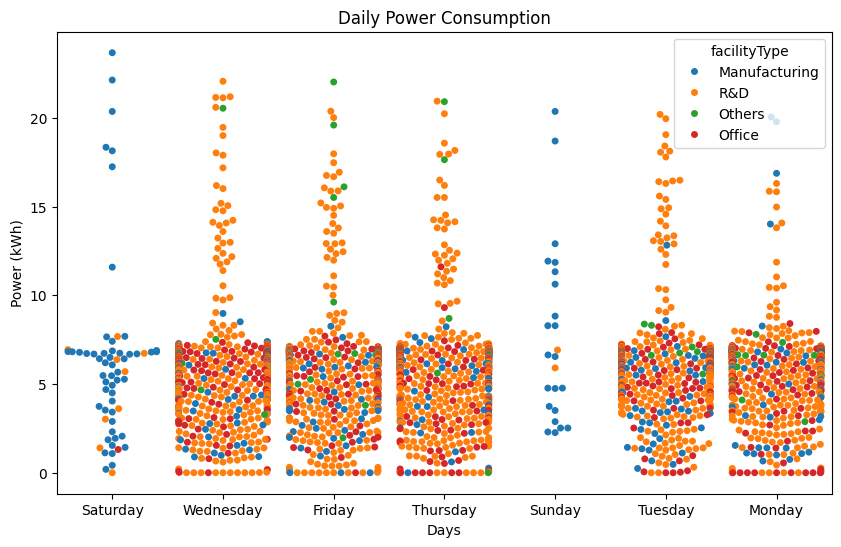

In [119]:
#convert facilityType to Catagorical data
df['facilityType'] = df['facilityType'].replace([1,2,3,4],['Manufacturing','Office','R&D','Others'])

#visualize daily power consumption
plt.figure(figsize=(10,6))
sns.swarmplot(data=df, y='kwhTotal', x='weekday', hue='facilityType')
plt.title('Daily Power Consumption')
plt.xlabel('Days')
plt.ylabel('Power (kWh)')
plt.show()

In [120]:
df.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,startTime_int,created_prefix
0,4926737,23.68,0.5,2023-10-07 07:18:43,0015-10-03 11:25:07,7,11,4.106667,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,7,0015
1,3738844,22.14,0.0,2023-08-05 05:29:02,0015-08-01 09:00:08,5,9,3.518333,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,5,0015
2,2682332,22.07,0.0,2023-09-06 13:43:27,0015-09-02 17:38:10,13,17,3.911944,Wednesday,android,NaN,78908148,995505,868085,0,R&D,0,0,1,0,0,0,0,0,13,0015
3,9025610,22.03,0.0,2023-06-02 16:55:35,0015-05-29 20:54:06,16,20,3.975278,Friday,android,NaN,78908148,863084,751082,0,Others,0,0,0,0,1,0,0,0,16,0015
4,4473237,21.20,0.0,2023-10-04 16:52:49,0015-09-30 20:42:06,16,20,3.821389,Wednesday,android,NaN,78908148,664306,868085,0,R&D,0,0,1,0,0,0,0,0,16,0015


#### For each Charging session, using the UserID, extract the vehicle Battery Capacity, Time Estimate to charge to 80% using a 50kW charger, and replace the Charging session KWTotal to 80% of Battery Capacity

In [121]:
# prompt: for each df[userId] find the correspond df2[userId], df2[Battery_capacity_kW] and df2[Est_Batt_Charge_Time_80perc50KW] and replace df[kwhTotal] with 0.8*df2[Battery_capacity_kW] and replace  df[chargeTimeHrs] with (1/60)*df2[Est_Batt_Charge_Time_80perc50KW]

# Assuming df and df2 are your DataFrames.

for index, row in df.iterrows():
    user_id = row['userId']
    matching_rows = df2[df2['userId'] == user_id]

    if not matching_rows.empty:
        # Assuming there's only one match per user ID in df2.  If not, adjust accordingly.
        matching_row = matching_rows.iloc[0]

        df.loc[index, 'kwhTotal'] = 0.8 * matching_row['Battery_capacity_kW']
        df.loc[index, 'chargeTimeHrs'] = matching_row['Est_Batt_Charge_Time_80perc50KW']

In [122]:
# prompt: print any rows of df[kwhTotal] with 0 or NaN

# Assuming df is already loaded and processed as in your provided code.

# Print rows where 'kwhTotal' is 0 or NaN
zero_nan_kwh = df[df['kwhTotal'].isin([0, np.nan])]
zero_nan_kwh

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,startTime_int,created_prefix


#### Updates the values of KwHr Total and ChargeTime Hours with a random percentage for each vechicle charging session

In [123]:
# prompt:  update values of both columns df[kwhTotal ] and df[chargeTimeHrs] with the same random percentage which varies between +10% and -10%

# Create a random percentage change between -10% and +10% for each row
random_percentage_changes = np.random.uniform(-0.1, 0.1, size=len(df))

# Apply the percentage change to both columns
df['kwhTotal'] = df['kwhTotal'] * (1 + random_percentage_changes)
df['chargeTimeHrs'] = df['chargeTimeHrs'] * (1 + random_percentage_changes)

In [124]:
df.head(5)

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,startTime_int,created_prefix
0,4926737,92.815080,0.5,2023-10-07 07:18:43,0015-10-03 11:25:07,7,11,97.455835,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,7,0015
1,3738844,80.584214,0.0,2023-08-05 05:29:02,0015-08-01 09:00:08,5,9,84.613424,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,5,0015
2,2682332,82.528564,0.0,2023-09-06 13:43:27,0015-09-02 17:38:10,13,17,86.654993,Wednesday,android,NaN,78908148,995505,868085,0,R&D,0,0,1,0,0,0,0,0,13,0015
3,9025610,84.131013,0.0,2023-06-02 16:55:35,0015-05-29 20:54:06,16,20,88.337564,Friday,android,NaN,78908148,863084,751082,0,Others,0,0,0,0,1,0,0,0,16,0015
4,4473237,77.422927,0.0,2023-10-04 16:52:49,0015-09-30 20:42:06,16,20,81.294073,Wednesday,android,NaN,78908148,664306,868085,0,R&D,0,0,1,0,0,0,0,0,16,0015


In [125]:
# prompt: convert df[chargeTimeHrs] to whole integers

# Convert 'chargeTimeHrs' to integers
df['chargeTimeHrs'] = df['chargeTimeHrs'].astype(int)

In [126]:
# prompt: change df[chargeTimeHrs] to df[chargeTimeMins]

# Rename the 'chargeTimeHrs' column to 'chargeTimeMins'
df = df.rename(columns={'chargeTimeHrs': 'chargeTimeMins'})

#### Calcate the new End Time for charging

In [127]:
# prompt: change value of df[chargeTimeHrs] to a timedelta(hours=value)

# Assuming df is already loaded and processed as in your provided code.

# Convert 'chargeTimeHrs' to timedelta objects
df['chargeTimeMins'] = pd.to_timedelta(df['chargeTimeMins'], unit='m')

In [128]:
# prompt: df[ended] = df[created] + df[chargeTimeMins]

# Assuming df is already loaded and processed as in your provided code.

# Calculate 'ended' column
df['ended'] = df['created'] + df['chargeTimeMins']

In [129]:
# prompt: update the name of df['chargeTimeMins'] to df[chargeTimeHrs]

# Rename the 'chargeTimeMins' column to 'chargeTimeHrs'
df = df.rename(columns={'chargeTimeMins': 'chargeTimeHrs'})

In [130]:
# prompt: extract the hour form df[ended] and update df['endTime']

# Assuming 'df' is your DataFrame and it has 'ended' and 'endTime' columns.
# Extract the hour from the 'ended' column and update the 'endTime' column.

df['endTime'] = df['ended'].dt.hour + 1

### Add the Most popular Charger ConnectionType to each charging session

In [131]:
# prompt: creat df[ConnectorType] with an initial value of 'CCS'. Then for each df[userId] find the correspond df2[userId] and df2[ConnectorType] and add the value of df2[ConnectorType] as  new value in the new column df[ConnectorType]

# Create the 'ConnectorType' column in df and initialize it to 'CCS'
df['ConnectorType'] = 'CCS'

# Iterate through rows of df
for index, row in df.iterrows():
    user_id = row['userId']
    # Find the corresponding row in df2 based on 'userId'
    matching_rows = df2[df2['userId'] == user_id]

    if not matching_rows.empty:
        # Assuming there's only one match per user ID in df2. If not, adjust accordingly.
        connector_type_from_df2 = matching_rows['ConnectorType'].iloc[0]

        # Update the 'ConnectorType' column with the value from df2
        df.loc[index, 'ConnectorType'] = connector_type_from_df2  # Assign directly

### Add a Default Base Price & Peak Adjustment Price to Charging Session Data

In [132]:
df.head(2)

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,startTime_int,created_prefix,ConnectorType
0,4926737,92.815080,0.5,2023-10-07 07:18:43,2023-10-07 08:55:43,7,9,0 days 01:37:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,7,0015,CCS
1,3738844,80.584214,0.0,2023-08-05 05:29:02,2023-08-05 06:53:02,5,7,0 days 01:24:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,5,0015,CCS


In [133]:
# prompt: add a new column name df2[BasePrice] and set df2[BasePrice] = 0.45

# Assuming df2 is already loaded and processed as in the previous code.

BasePrice = 0.55

df['BasePrice'] = BasePrice

In [134]:
# prompt: add a new column named df2[PeakPriceAdjustment] and set df2[PeakPriceAdjustment] = 0.5
#Can be varied to adjust for peak periods.

PeakPriceAdjustment = 0.0

df['PeakPriceAdjustment'] = PeakPriceAdjustment

## INCORPORATE VICTORIA WHOLESALE ELECTRICITY PRICES

### Victoria Energy 5 min Demand Proile
This work focusses on the locaised region of Victoria Energy Demand to better understand the dynamics of EV Impact & Deployment scenarios, Demand & Charging Infrastructure, Oil Displacement and Emissions Reduction.

it is important for electricity generators to understand the changing dynamics of the electricity demand.

The Data is sourced from the following link:

https://aemo.com.au/energy-systems/electricity/national-electricity-market-nem/data-nem/aggregated-data

In [135]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('dark')

import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
#from features_preprocessing import transform_to_windows, rename_cols

In [136]:
!tar -xzvf Energy_Demand.tar.gz

Energy_Demand/
Energy_Demand/PRICE_AND_DEMAND_202201_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202202_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202203_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202204_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202205_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202206_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202207_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202208_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202209_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202210_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202211_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202212_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202301_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202302_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202303_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202304_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202305_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202306_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202307_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202308_VIC1.csv
Energy_Demand/PRICE_AND_DEMAND_202309_VIC1.cs

In [137]:
import pandas as pd
import glob

# Get a list of all CSV files in a directory
csv_files = glob.glob('/content/Energy_Demand/*.csv')

In [138]:
# Create an empty dataframe to store the combined data
combined_df = pd.DataFrame()

In [139]:
# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    df6 = pd.read_csv(csv_file)
    combined_df = pd.concat([combined_df, df6])

In [140]:
loaded_energy_data = combined_df.copy()

In [141]:
loaded_energy_data.tail(5)

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
8635,VIC1,2022/11/30 23:40:00,4486.28,113.12,TRADE
8636,VIC1,2022/11/30 23:45:00,4444.92,113.03,TRADE
8637,VIC1,2022/11/30 23:50:00,4456.04,113.99,TRADE
8638,VIC1,2022/11/30 23:55:00,4372.91,105.36,TRADE
8639,VIC1,2022/12/01 00:00:00,4340.46,104.68,TRADE


### Drop Irrelevant columns, and data with in correct settlements dates

In [142]:
# prompt: drop columns REGION TOTALDEMAND and PERIODTYPE from loaded_energy_data

# Assuming loaded_energy_data is your DataFrame.

# Drop the specified columns if they exist
columns_to_drop = ['REGION', 'TOTALDEMAND', 'PERIODTYPE']
for col in columns_to_drop:
    if col in loaded_energy_data.columns:
        loaded_energy_data = loaded_energy_data.drop(col, axis=1)

In [143]:
# prompt: convert loaded_energy_data[SETTLEMENTDATE] to a string

# Assuming loaded_energy_data is already loaded as shown in your provided code.

# Convert the 'SETTLEMENTDATE' column to string type.
loaded_energy_data['SETTLEMENTDATE'] = loaded_energy_data['SETTLEMENTDATE'].astype(str)

In [144]:
# prompt: print the unique lengths of loaded_energy_data['SETTLEMENTDATE']

unique_lengths = loaded_energy_data['SETTLEMENTDATE'].str.len().unique()
unique_lengths

array([19, 14, 15, 16])

In [145]:
# prompt: remove rows in loaded_energy_data where  lengths of loaded_energy_data['SETTLEMENTDATE'] is less than 19

# Assuming loaded_energy_data is already loaded and processed as in your provided code.

# Remove rows where the length of 'SETTLEMENTDATE' is less than 19
loaded_energy_data = loaded_energy_data[loaded_energy_data['SETTLEMENTDATE'].str.len() >= 19]

### Convert & Set Date Time index for interpolation

In [146]:
# prompt: convert loaded_energy_data[SETTLEMENTDATE] to date time

# Convert 'SETTLEMENTDATE' to datetime objects
# Specify the format to match the data format in the column.
loaded_energy_data['SETTLEMENTDATE'] = pd.to_datetime(loaded_energy_data['SETTLEMENTDATE'], format='%Y/%m/%d %H:%M:%S')

<ipython-input-146-324790f73531>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [147]:
loaded_energy_data

,SETTLEMENTDATE,RRP
0,2022-08-01 00:05:00,8.94
1,2022-08-01 00:10:00,8.94
2,2022-08-01 00:15:00,8.94
3,2022-08-01 00:20:00,8.94
4,2022-08-01 00:25:00,8.94
...,...,...
8635,2022-11-30 23:40:00,113.12
8636,2022-11-30 23:45:00,113.03
8637,2022-11-30 23:50:00,113.99
8638,2022-11-30 23:55:00,105.36


In [148]:
# prompt: Set the loaded_energy_data index to SETTLEMENTDATE

# Assuming loaded_energy_data is already loaded and processed as in your provided code.

# Set 'SETTLEMENTDATE' as the index
loaded_energy_data = loaded_energy_data.set_index('SETTLEMENTDATE')

### Resample & Interpolate the spot electricity price

In [149]:
# prompt: resample the loaded_energy_data index to seconds , and user linear interpolation to find the resample value of RRP

# Resample the index to seconds and use linear interpolation for RRP
loaded_energy_data = loaded_energy_data.resample('S').interpolate(method='linear')

<ipython-input-149-81d901ff0cf3>:4: FutureWarning:

'S' is deprecated and will be removed in a future version, please use 's' instead.



In [150]:
loaded_energy_data

,RRP
SETTLEMENTDATE,
2022-02-01 00:05:00,120.960000
2022-02-01 00:05:01,121.544967
2022-02-01 00:05:02,122.129933
2022-02-01 00:05:03,122.714900
2022-02-01 00:05:04,123.299867
...,...
2023-12-31 23:59:56,51.430000
2023-12-31 23:59:57,51.430000
2023-12-31 23:59:58,51.430000


### Redcuce the resampled dataset size ****

In [151]:
# prompt: if loaded_energy_data[SETTLEMENTDATE] is not in df[created] the delete that row in loaded_energy_data
ERROR: Delete or comment if cell needs to be run to generate CSV, which 30mins+
# Assuming 'df' and 'loaded_energy_data' are already defined DataFrames.
# Assuming 'created' column exists in 'df' and 'SETTLEMENTDATE' in 'loaded_energy_data'.

# Convert 'created' column to datetime objects if it's not already.
if not pd.api.types.is_datetime64_any_dtype(df['created']):
    try:
        df['created'] = pd.to_datetime(df['created'])
    except (KeyError, ValueError, TypeError):
        print("Error converting 'created' to datetime.")
        # Handle the error appropriately, e.g., skip the operation or raise an exception

# Convert 'SETTLEMENTDATE' column to datetime objects if it's not already.
# Access the index of loaded_energy_data instead of columns
if not pd.api.types.is_datetime64_any_dtype(loaded_energy_data.index):
  try:
    loaded_energy_data.index = pd.to_datetime(loaded_energy_data.index)  # Convert the index to datetime
  except (KeyError, ValueError, TypeError):
    print("Error converting 'SETTLEMENTDATE' to datetime.")
    # Handle the error appropriately

# Create a set of 'created' dates for faster lookup
created_dates = set(df['created'].dt.to_pydatetime())

# Iterate through loaded_energy_data and delete rows where SETTLEMENTDATE is not in df['created']
index_to_delete = []
for index, row in loaded_energy_data.iterrows():
    if index not in created_dates:  # Check against the index now
        index_to_delete.append(index)

loaded_energy_data = loaded_energy_data.drop(index_to_delete)

SyntaxError: invalid decimal literal (<ipython-input-151-ef67ebe15890>, line 2)

### Write and Read loaded_energy_data CSV

In [ ]:
len (loaded_energy_data), len(df['created'])

In [ ]:
# prompt: write the dataframe loaded_energy_data to a csv file

# Assuming loaded_energy_data is already defined and processed.
loaded_energy_data.to_csv('loaded_energy_data.csv', index=True)

In [152]:
# prompt: load loaded_energy_data.csv into a dataframe name loaded_energy_data

loaded_energy_data = pd.read_csv('loaded_energy_data.csv', index_col=0)

### Review the Min and Max RRP for Wholesale Electricity

In [153]:
# prompt: print the minimum and maximum of loaded_energy_data[RRP]

print(f"Minimum RRP: {loaded_energy_data['RRP'].min()}")
print(f"Maximum RRP: {loaded_energy_data['RRP'].max()}")

Minimum RRP: -994.492
Maximum RRP: 9966.766


### Convert RRP per MW to RRP per KW

In [154]:
# prompt: Change the column name from RRP to RRPperMW in the dataframe loaded_energy_data

# Rename the 'RRP' column to 'RRPperMW'
loaded_energy_data = loaded_energy_data.rename(columns={'RRP': 'RRPperMW'})

In [155]:
# prompt: add a new column loaded_energy_data[RRPperKW] = loaded_energy_data[RRPperMW] /1000

# Assuming loaded_energy_data is already defined and processed.

loaded_energy_data['RRPperKW'] = loaded_energy_data['RRPperMW'] / 1000

In [156]:
loaded_energy_data.tail(2)

,RRPperMW,RRPperKW
SETTLEMENTDATE,,
2023-10-07 15:49:09,22.7279,0.022728
2023-10-08 12:44:59,-20.0155,-0.020015


In [157]:
len(loaded_energy_data)

3393

In [158]:
# prompt: convert loaded_energy_data[SETTLEMENT] to data time and the dataframe index

# Assuming loaded_energy_data is already loaded and processed as in your provided code.

# Convert the index to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(loaded_energy_data.index):
    loaded_energy_data.index = pd.to_datetime(loaded_energy_data.index)

# Now the index is a DateTimeIndex, so you can use it directly in the DataFrame

### Calculate RRPperKW24hrs which is the daily rolling mean of loaded_energy_data[RRPperKW] over the index of loaded_energy_data

Also Review the Min & Max Value

In [159]:
# prompt: add a new column loaded_energy_data[RRPperKW24hrs] which is the daily rolling mean of loaded_energy_data[RRPperKW] over the index of loaded_energy_data

# Calculate the daily rolling mean of 'RRPperKW'
loaded_energy_data['RRPperKW24hrs'] = loaded_energy_data['RRPperKW'].rolling(window='24H').mean()

<ipython-input-159-e8d588b49359>:4: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



In [160]:
loaded_energy_data.head()

,RRPperMW,RRPperKW,RRPperKW24hrs
SETTLEMENTDATE,,,
2022-11-22 15:01:17,-38.000000,-0.038000,-0.038000
2022-11-22 15:40:26,-17.119200,-0.017119,-0.027560
2022-11-23 17:40:26,149.500000,0.149500,0.149500
2022-11-23 19:01:41,283.847633,0.283848,0.216674
2022-11-24 19:20:45,299.500000,0.299500,0.299500


In [161]:
# prompt: print the minimum and maximum of loaded_energy_data[RRPperKW24hrs]

print(f"Minimum RRPperKW24hrs: {loaded_energy_data['RRPperKW24hrs'].min()}")
print(f"Maximum RRPperKW24hrs: {loaded_energy_data['RRPperKW24hrs'].max()}")

Minimum RRPperKW24hrs: -0.44588132499999994
Maximum RRPperKW24hrs: 2.131064826666667


### Add the RRPperKW & RRPperKW24Hrs to Charging Session Data

In [162]:
# prompt: for each df[created] find the corresponding index in loaded_energy_data and the loaded_energy_data['RRPperKW'] , and  add the value of loaded_energy_data['RRPperKW']  to the new column df[RRPperKW]

# Assuming df and loaded_energy_data are already defined DataFrames.

df['RRPperKW'] = 0.0  # Initialize the new column

for index, row in df.iterrows():
    created_time = row['created']
    try:
        # Find the closest time in loaded_energy_data
        closest_time = min(loaded_energy_data.index, key=lambda x: abs(x - created_time))

        # Get the RRPperKW value at the closest time
        rpperkw_value = loaded_energy_data.loc[closest_time, 'RRPperKW']

        # Assign the RRPperKW value to the new column in df
        df.loc[index, 'RRPperKW'] = rpperkw_value
    except KeyError:
        print(f"Warning: No RRPperKW value found for created time {created_time}.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

In [163]:
# prompt: for each df[created] find the corresponding index in loaded_energy_data and the loaded_energy_data['RRPperKW24hrs'] , and  add the value of loaded_energy_data['RRPperKW24hrs']  to the new column df[RRPperKW24hrs]

# Assuming df and loaded_energy_data are already defined DataFrames.
df['RRPperKW24hrs'] = 0.0  # Initialize the new column

for index, row in df.iterrows():
    created_time = row['created']
    try:
        # Find the closest time in loaded_energy_data
        closest_time = min(loaded_energy_data.index, key=lambda x: abs(x - created_time))

        # Get the RRPperKW24hrs value at the closest time
        rpperkw24hrs_value = loaded_energy_data.loc[closest_time, 'RRPperKW24hrs']

        # Assign the RRPperKW24hrs value to the new column in df
        df.loc[index, 'RRPperKW24hrs'] = rpperkw24hrs_value
    except KeyError:
        print(f"Warning: No RRPperKW24hrs value found for created time {created_time}.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

In [164]:
# prompt: add a new column df[CustPricePerKW] = df[BasePrice] + df[PeakPriceAdjustment] + df[RRPperKW24hrs]

df['CustPricePerKW'] = df['BasePrice'] + df['PeakPriceAdjustment'] + df['RRPperKW24hrs']

In [165]:
# prompt: Check df['CustPricePerKW'] for Nan values and print the minimum and maximum

# Check for NaN values in 'CustPricePerKW'
nan_values = df['CustPricePerKW'].isna().sum()
print(f"Number of NaN values in 'CustPricePerKW': {nan_values}")

# Print the minimum and maximum values, handling potential NaN values
if nan_values > 0:
    min_cust_price = df['CustPricePerKW'].min(skipna=True)  # Skip NaN values for min
    max_cust_price = df['CustPricePerKW'].max(skipna=True)  # Skip NaN values for max
    print(f"Minimum 'CustPricePerKW' (excluding NaN): {min_cust_price}")
    print(f"Maximum 'CustPricePerKW' (excluding NaN): {max_cust_price}")
else:
    min_cust_price = df['CustPricePerKW'].min()
    max_cust_price = df['CustPricePerKW'].max()
    print(f"Minimum 'CustPricePerKW': {min_cust_price}")
    print(f"Maximum 'CustPricePerKW': {max_cust_price}")

Number of NaN values in 'CustPricePerKW': 0
Minimum 'CustPricePerKW': 0.1041186750000001
Maximum 'CustPricePerKW': 2.681064826666667


In [166]:
# prompt: change df[dollars] to df[CustPayAmount]

# Rename the 'dollars' column to 'CustPayAmount' if it exists
if 'dollars' in df.columns:
    df = df.rename(columns={'dollars': 'CustPayAmount'})

In [167]:
# prompt: df[CustPayAmount] = df[kwhTotal]*df[CustPricePerKW]

df['CustPayAmount'] = df['kwhTotal'] * df['CustPricePerKW']

In [168]:
# prompt: print the maximium and minimum for df['CustPayAmount']

print(f"Minimum CustPayAmount: {df['CustPayAmount'].min()}")
print(f"Maximum CustPayAmount: {df['CustPayAmount'].max()}")

Minimum CustPayAmount: 4.295095884134886
Maximum CustPayAmount: 266.2232948850434


In [169]:
df.head()

,sessionId,kwhTotal,CustPayAmount,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,startTime_int,created_prefix,ConnectorType,BasePrice,PeakPriceAdjustment,RRPperKW,RRPperKW24hrs,CustPricePerKW
0,4926737,92.815080,52.914811,2023-10-07 07:18:43,2023-10-07 08:55:43,7,9,0 days 01:37:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,7,0015,CCS,0.55,0.0,0.011560,0.020110,0.570110
1,3738844,80.584214,42.910162,2023-08-05 05:29:02,2023-08-05 06:53:02,5,7,0 days 01:24:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,5,0015,CCS,0.55,0.0,0.008950,-0.017512,0.532488
2,2682332,82.528564,43.731282,2023-09-06 13:43:27,2023-09-06 15:09:27,13,16,0 days 01:26:00,Wednesday,android,NaN,78908148,995505,868085,0,R&D,0,0,1,0,0,0,0,0,13,0015,CCS,0.55,0.0,-0.111598,-0.020107,0.529893
3,9025610,84.131013,59.752299,2023-06-02 16:55:35,2023-06-02 18:23:35,16,19,0 days 01:28:00,Friday,android,NaN,78908148,863084,751082,0,Others,0,0,0,0,1,0,0,0,16,0015,CCS,0.55,0.0,0.295398,0.160229,0.710229
4,4473237,77.422927,46.193567,2023-10-04 16:52:49,2023-10-04 18:13:49,16,19,0 days 01:21:00,Wednesday,android,NaN,78908148,664306,868085,0,R&D,0,0,1,0,0,0,0,0,16,0015,CCS,0.55,0.0,0.041089,0.046639,0.596639


In [170]:
# prompt: find the latest date from df[created] and the corresponding value for df[CustPricePerKW]

# Find the latest date in the 'created' column
latest_date = df['created'].max()

# Find the corresponding 'CustPricePerKW' value for the latest date
latest_price = df[df['created'] == latest_date]['CustPricePerKW'].iloc[0]

print(f"Latest Date: {latest_date}")
print(f"Corresponding CustPricePerKW: {latest_price}")

Latest Date: 2023-10-08 12:44:59
Corresponding CustPricePerKW: 0.5513562000000001


### Add Random APayment Type to Charging Data

In [171]:
# prompt: create a new df[PaymentType] that randonmly selects s payment type from ['American Express', 'Visa', 'MasterCard', 'Cash']

# Create a new column 'PaymentType' with randomly selected payment types
payment_types = ['American Express', 'Visa', 'MasterCard', 'Cash']
df['PaymentType'] = np.random.choice(payment_types, size=len(df))

### Calculate the Slot Length

In [172]:
# prompt: create a new df[SlotLength] = df[endTime] - df[startTime]

# Assuming df is already loaded and processed as in your provided code.

# Calculate 'SlotLength'
df['SlotLength'] = df['endTime'] - df['startTime']

### Calculate the Booked Timeslots

In [173]:
# prompt: create a list of all the integer numbers between  df['startTime'] and df['endTime'] and add them to df[BookingTimeSlots]

# Create an empty list to store the time slots
df['BookingTimeSlots'] = [[] for _ in range(len(df))] # Initialize as a column of empty lists

# Iterate through the DataFrame
for index, row in df.iterrows():
    start_time = int(row['startTime'])
    end_time = int(row['endTime'])

    # Create a list of integers between start_time and end_time (inclusive)
    time_slots = list(range(start_time, end_time + 1))

    # Add the time slots to the 'BookingTimeSlots' column
    df.at[index, 'BookingTimeSlots'] = time_slots # Use .at instead of .loc

### Add a Booking Deposit

In [174]:
# prompt: add a new column df[BookingDeposit] = 1.00
# A nominal amount > min. Customer transaction.

df['BookingDeposit'] = 1.00

### Add an Estimate Cost for a Slot length with a 50Kw Charger

In [175]:
# prompt: add a new column df[EstCost50KWCharger] = df[SlotLength]*50*(df[BasePrice]+df[PeakPriceAdjustment]

# Assuming df is already loaded and processed as in your provided code.

# Calculate 'EstCost50KWCharger'
df['EstCost50KWCharger'] = df['SlotLength'] * 50 * (df['BasePrice'] + df['PeakPriceAdjustment'])

In [176]:
df.head()

,sessionId,kwhTotal,CustPayAmount,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,startTime_int,created_prefix,ConnectorType,BasePrice,PeakPriceAdjustment,RRPperKW,RRPperKW24hrs,CustPricePerKW,PaymentType,SlotLength,BookingTimeSlots,BookingDeposit,EstCost50KWCharger
0,4926737,92.815080,52.914811,2023-10-07 07:18:43,2023-10-07 08:55:43,7,9,0 days 01:37:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,7,0015,CCS,0.55,0.0,0.011560,0.020110,0.570110,American Express,2,"[7, 8, 9]",1.0,55.0
1,3738844,80.584214,42.910162,2023-08-05 05:29:02,2023-08-05 06:53:02,5,7,0 days 01:24:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,5,0015,CCS,0.55,0.0,0.008950,-0.017512,0.532488,Cash,2,"[5, 6, 7]",1.0,55.0
2,2682332,82.528564,43.731282,2023-09-06 13:43:27,2023-09-06 15:09:27,13,16,0 days 01:26:00,Wednesday,android,NaN,78908148,995505,868085,0,R&D,0,0,1,0,0,0,0,0,13,0015,CCS,0.55,0.0,-0.111598,-0.020107,0.529893,MasterCard,3,"[13, 14, 15, 16]",1.0,82.5
3,9025610,84.131013,59.752299,2023-06-02 16:55:35,2023-06-02 18:23:35,16,19,0 days 01:28:00,Friday,android,NaN,78908148,863084,751082,0,Others,0,0,0,0,1,0,0,0,16,0015,CCS,0.55,0.0,0.295398,0.160229,0.710229,American Express,3,"[16, 17, 18, 19]",1.0,82.5
4,4473237,77.422927,46.193567,2023-10-04 16:52:49,2023-10-04 18:13:49,16,19,0 days 01:21:00,Wednesday,android,NaN,78908148,664306,868085,0,R&D,0,0,1,0,0,0,0,0,16,0015,CCS,0.55,0.0,0.041089,0.046639,0.596639,Cash,3,"[16, 17, 18, 19]",1.0,82.5


# Creation of Database Tables

## Create EV Database  Table CSV



Table EV {

  Id varchar [PK, unique]

  Manufacturer varchar

  Model varchar

  VehicleYear varchar

  VehicleClass varchar

  FuelType varchar

  ConnectorType varchar

  BatteryCapacityKwh float [ref: - EV.ElectricRangeKm]

  EstBattChargeTime80perc50KW float [ref: - EV.BatteryCapacityKwh]

  EnergyConsumptionWhkm varchar [ref: - EV.ElectricRangeKm]

  ElectricRangeKm float

  UserId int
  
}



In [177]:
# prompt: list columns of df2

df2.columns


Index(['VEHICLE TYPE', 'FUEL TYPE', 'MODEL', 'VARIANT DETAILS',
       'LISTED PRICE ($AUD)', 'FAST CHARGE TIME (minutes)', 'ANCAP RATING',
       'RANGE (km)', 'ENERGY CONSUMPTION', 'Manufacturer',
       'Battery_capacity_kW', 'Est_Batt_Charge_Time_80perc50KW', 'VehicleYear',
       'ConnectorType', 'userId', 'vehicleID'],
      dtype='object')

In [178]:
# prompt: Copy df2 to a dataframe name ev

ev = df2.copy()


In [179]:
# prompt: drop ev[VARIANT DETAILS], ev[LISTED PRICE ($AUD)], ev[FAST CHARGE TIME (minutes)], ev[ANCAP RATING]

# Assuming df2 is already loaded and processed as in the previous code.

# Drop specified columns
columns_to_drop = ['VARIANT DETAILS', 'LISTED PRICE ($AUD)', 'FAST CHARGE TIME (minutes)', 'ANCAP RATING']
ev = df2.drop(columns=columns_to_drop, errors='ignore') # Use errors='ignore' to avoid errors if columns don't exist

# Display the updated DataFrame to verify the changes
ev.head(2)

,VEHICLE TYPE,FUEL TYPE,MODEL,RANGE (km),ENERGY CONSUMPTION,Manufacturer,Battery_capacity_kW,Est_Batt_Charge_Time_80perc50KW,VehicleYear,ConnectorType,userId,vehicleID
0,Large SUV,BEV,Audi e-tron,459.0,23.2,Audi,106.488,89.44992,2024,CCS,78908148,VVXW7941
1,Large Car,BEV,Audi e-tron GT,540.0,19.2,Audi,103.680,87.09120,2024,CCS,35897499,RYLU9171


In [180]:
# prompt: change ev[vehicleID] to ev[Id] , and ev[userId] to ev[UserId], and ev[Est_Batt_Charge_Time_80perc50KW] to ev[EstBattChargeTime80perc50KW], and ev[Battery_capacity_kW] to ev[BatteryCapacityKwh], and ev[ENERGY CONSUMPTION] to ev[EnergyConsumptionWhkm], and ev[RANGE (km)] to ev[ElectricRangeKm], and ev[MODEL] to ev[Model], and ev[VEHICLE TYPE] to ev[VehicleClass], and ev[FUEL TYPE] to ev[FuelType]

ev = ev.rename(columns={
    'vehicleID': 'Id',
    'userId': 'UserId',
    'Est_Batt_Charge_Time_80perc50KW': 'EstBattChargeTime80perc50KW',
    'Battery_capacity_kW': 'BatteryCapacityKwh',
    'ENERGY CONSUMPTION': 'EnergyConsumptionWhkm',
    'RANGE (km)': 'ElectricRangeKm',
    'MODEL': 'Model',
    'VEHICLE TYPE': 'VehicleClass',
    'FUEL TYPE': 'FuelType'
})

In [181]:
ev.head(2)

,VehicleClass,FuelType,Model,ElectricRangeKm,EnergyConsumptionWhkm,Manufacturer,BatteryCapacityKwh,EstBattChargeTime80perc50KW,VehicleYear,ConnectorType,UserId,Id
0,Large SUV,BEV,Audi e-tron,459.0,23.2,Audi,106.488,89.44992,2024,CCS,78908148,VVXW7941
1,Large Car,BEV,Audi e-tron GT,540.0,19.2,Audi,103.680,87.09120,2024,CCS,35897499,RYLU9171


In [182]:
# prompt: Display the data types of columns in EV

ev.dtypes

,0
VehicleClass,object
FuelType,object
Model,object
ElectricRangeKm,float64
EnergyConsumptionWhkm,float64
Manufacturer,object
BatteryCapacityKwh,float64
EstBattChargeTime80perc50KW,float64
VehicleYear,int64
ConnectorType,object


In [183]:
# prompt: write the dataframe ev to a csv file

ev.to_csv('ev.csv', index=False)


## Create PurchaseWholesaleElec Database Table CSV

Table PurchaseWholesaleElec {

  Id int [PK, unique]

  StationId int

  SupplyId int

  ExpenditureCode varchar

  RRPperKW float [ref: > PurchaseWholesaleElec.RRPperKW24hrs]

  RRPperKW24hrs float [ref: - PurchaseWholesaleElec.CustPricePerKW]

  BasePrice money [ref: - PurchaseWholesaleElec.CustPricePerKW]

  PeakPriceAdjustment money [ref: - PurchaseWholesaleElec.CustPricePerKW]

  CustPricePerKW money

  PurchaseDate datetime
  
}

In [184]:
df.head(2)

,sessionId,kwhTotal,CustPayAmount,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,startTime_int,created_prefix,ConnectorType,BasePrice,PeakPriceAdjustment,RRPperKW,RRPperKW24hrs,CustPricePerKW,PaymentType,SlotLength,BookingTimeSlots,BookingDeposit,EstCost50KWCharger
0,4926737,92.815080,52.914811,2023-10-07 07:18:43,2023-10-07 08:55:43,7,9,0 days 01:37:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,7,0015,CCS,0.55,0.0,0.01156,0.020110,0.570110,American Express,2,"[7, 8, 9]",1.0,55.0
1,3738844,80.584214,42.910162,2023-08-05 05:29:02,2023-08-05 06:53:02,5,7,0 days 01:24:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,5,0015,CCS,0.55,0.0,0.00895,-0.017512,0.532488,Cash,2,"[5, 6, 7]",1.0,55.0


In [185]:
# prompt: add column df[SupplyId] with a Default Value of VIC and a column df[ExpenditureCode] with a default value Wholesale_cost

# Add the new columns with default values
df['SupplyId'] = 'VIC'
df['ExpenditureCode'] = 'Wholesale_cost'

In [186]:
# prompt: add a column df[PurchaseDate] = df[created]

df['PurchaseDate'] = df['created']

In [187]:
# prompt: copy dataframe df to dataframe PurchaseWholesaleElec

PurchaseWholesaleElec = df.copy()


In [188]:
PurchaseWholesaleElec.head(2)

,sessionId,kwhTotal,CustPayAmount,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,startTime_int,created_prefix,ConnectorType,BasePrice,PeakPriceAdjustment,RRPperKW,RRPperKW24hrs,CustPricePerKW,PaymentType,SlotLength,BookingTimeSlots,BookingDeposit,EstCost50KWCharger,SupplyId,ExpenditureCode,PurchaseDate
0,4926737,92.815080,52.914811,2023-10-07 07:18:43,2023-10-07 08:55:43,7,9,0 days 01:37:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,7,0015,CCS,0.55,0.0,0.01156,0.020110,0.570110,American Express,2,"[7, 8, 9]",1.0,55.0,VIC,Wholesale_cost,2023-10-07 07:18:43
1,3738844,80.584214,42.910162,2023-08-05 05:29:02,2023-08-05 06:53:02,5,7,0 days 01:24:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,5,0015,CCS,0.55,0.0,0.00895,-0.017512,0.532488,Cash,2,"[5, 6, 7]",1.0,55.0,VIC,Wholesale_cost,2023-08-05 05:29:02


In [189]:
# prompt: change PurchaseWholesaleElec[sessionId] to PurchaseWholesaleElec[Id]

# Assuming df and PurchaseWholesaleElec are already defined DataFrames.

# Rename the 'sessionId' column to 'Id' in PurchaseWholesaleElec
if 'sessionId' in PurchaseWholesaleElec.columns:
    PurchaseWholesaleElec = PurchaseWholesaleElec.rename(columns={'sessionId': 'Id'})
    print("Column 'sessionId' renamed to 'Id' in PurchaseWholesaleElec")
else:
    print("Column 'sessionId' not found in PurchaseWholesaleElec. No renaming performed.")

PurchaseWholesaleElec.head(2)

Column 'sessionId' renamed to 'Id' in PurchaseWholesaleElec


,Id,kwhTotal,CustPayAmount,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,startTime_int,created_prefix,ConnectorType,BasePrice,PeakPriceAdjustment,RRPperKW,RRPperKW24hrs,CustPricePerKW,PaymentType,SlotLength,BookingTimeSlots,BookingDeposit,EstCost50KWCharger,SupplyId,ExpenditureCode,PurchaseDate
0,4926737,92.815080,52.914811,2023-10-07 07:18:43,2023-10-07 08:55:43,7,9,0 days 01:37:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,7,0015,CCS,0.55,0.0,0.01156,0.020110,0.570110,American Express,2,"[7, 8, 9]",1.0,55.0,VIC,Wholesale_cost,2023-10-07 07:18:43
1,3738844,80.584214,42.910162,2023-08-05 05:29:02,2023-08-05 06:53:02,5,7,0 days 01:24:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,5,0015,CCS,0.55,0.0,0.00895,-0.017512,0.532488,Cash,2,"[5, 6, 7]",1.0,55.0,VIC,Wholesale_cost,2023-08-05 05:29:02


In [190]:
# prompt: From dataframe PurchaseWholesaleElec drop the following columns kwhTotal, CustPayAmount, created, ended, startTime, endTime, chargeTimeHrs, weekday , platform, distance, userId, managerVehicle, facilityType, Mon, Tues, Wed, Thurs, Fri, Sat, Sun, reportedZip, startTime_int, created_prefix, ConnectorType, PaymentType, SlotLength, BookingTimeSlots, BookingDeposit, EstCost50KWCharger, locationId

columns_to_drop = ['kwhTotal', 'CustPayAmount', 'created', 'ended', 'startTime', 'endTime', 'chargeTimeHrs',
                   'weekday' , 'platform', 'distance', 'userId', 'managerVehicle', 'facilityType', 'Mon',
                   'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip', 'startTime_int', 'created_prefix',
                   'ConnectorType', 'PaymentType', 'SlotLength', 'BookingTimeSlots', 'BookingDeposit',
                   'EstCost50KWCharger', 'locationId']

PurchaseWholesaleElec = PurchaseWholesaleElec.drop(columns=columns_to_drop, errors='ignore')

In [191]:
# prompt: change PurchaseWholesaleElec[stationId] to PurchaseWholesaleElec[StationId], PurchaseWholesaleElec[locationId] to PurchaseWholesaleElec[LocationId],

# Rename the columns
PurchaseWholesaleElec = PurchaseWholesaleElec.rename(columns={'stationId': 'StationId', 'locationId': 'LocationId'})

In [192]:
# prompt: List the datatypes of PurchaseWholesaleElec

import pandas as pd

# Assuming 'df' and 'PurchaseWholesaleElec' are already defined DataFrames as in your provided code.

# Display the data types of columns in PurchaseWholesaleElec
PurchaseWholesaleElec.dtypes

,0
Id,int64
StationId,int64
BasePrice,float64
PeakPriceAdjustment,float64
RRPperKW,float64
RRPperKW24hrs,float64
CustPricePerKW,float64
SupplyId,object
ExpenditureCode,object
PurchaseDate,datetime64[ns]


In [193]:
PurchaseWholesaleElec.head(2)

,Id,StationId,BasePrice,PeakPriceAdjustment,RRPperKW,RRPperKW24hrs,CustPricePerKW,SupplyId,ExpenditureCode,PurchaseDate
0,4926737,730023,0.55,0.0,0.01156,0.020110,0.570110,VIC,Wholesale_cost,2023-10-07 07:18:43
1,3738844,730023,0.55,0.0,0.00895,-0.017512,0.532488,VIC,Wholesale_cost,2023-08-05 05:29:02


In [194]:
# prompt: write the dataframe PurchaseWholesaleElec to a csv file

PurchaseWholesaleElec.to_csv('PurchaseWholesaleElec.csv', index=False)

## Create UserPayment Database Table CSV

Table UserPayment {

  Id int [PK, unique]

  BookingDeposit money [ref: - UserPayment.TransAmount]

  PurchaseId int

  PaymentType varchar

  CustPayAmount money [ref: - UserPayment.TransAmount]

  TransAmount money

  UserId int

  StationId int

  PaymentDate datetime

  ChargingId int

  OrderId int
  
}

In [195]:
df.head(2)

,sessionId,kwhTotal,CustPayAmount,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,startTime_int,created_prefix,ConnectorType,BasePrice,PeakPriceAdjustment,RRPperKW,RRPperKW24hrs,CustPricePerKW,PaymentType,SlotLength,BookingTimeSlots,BookingDeposit,EstCost50KWCharger,SupplyId,ExpenditureCode,PurchaseDate
0,4926737,92.815080,52.914811,2023-10-07 07:18:43,2023-10-07 08:55:43,7,9,0 days 01:37:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,7,0015,CCS,0.55,0.0,0.01156,0.020110,0.570110,American Express,2,"[7, 8, 9]",1.0,55.0,VIC,Wholesale_cost,2023-10-07 07:18:43
1,3738844,80.584214,42.910162,2023-08-05 05:29:02,2023-08-05 06:53:02,5,7,0 days 01:24:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,5,0015,CCS,0.55,0.0,0.00895,-0.017512,0.532488,Cash,2,"[5, 6, 7]",1.0,55.0,VIC,Wholesale_cost,2023-08-05 05:29:02


In [196]:
# prompt: add a column df[PaymentDate] = df[ended]

df['PaymentDate'] = df['ended']

In [197]:
# prompt: add a column df[TransAmount] = maximum of ( ( df[CustPayAmount] - df[BookingDeposit] ) or df[BookingDeposit] )

# Assuming df is already loaded and processed as in your provided code.

# Calculate TransAmount
df['TransAmount'] = np.maximum(df['CustPayAmount'] - df['BookingDeposit'], df['BookingDeposit'])

Need to Link Order, charging session and purchase ID together with the same Id

In [198]:
# prompt: copy df[sessionId] to new column df[ChargingId] and df[OrderId]

# Assuming 'df' is your DataFrame and 'sessionId' column exists.
df['ChargingId'] = df['sessionId']
df['OrderId'] = df['sessionId']

In [199]:
# prompt: copy dataframe df to dataframe UserPayment

UserPayment = df.copy()


In [200]:
# prompt: change UserPayment[sessionId] to UserPayment[Id]

# Assuming df and PurchaseWholesaleElec are already defined DataFrames.

# Rename the 'sessionId' column to 'Id' in PurchaseWholesaleElec
if 'sessionId' in UserPayment.columns:
    UserPayment = UserPayment.rename(columns={'sessionId': 'Id'})
    print("Column 'sessionId' renamed to 'Id' in UserPayment")
else:
    print("Column 'sessionId' not found in UserPayment. No renaming performed.")

Column 'sessionId' renamed to 'Id' in UserPayment


In [201]:
UserPayment.head(2)

,Id,kwhTotal,CustPayAmount,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,startTime_int,created_prefix,ConnectorType,BasePrice,PeakPriceAdjustment,RRPperKW,RRPperKW24hrs,CustPricePerKW,PaymentType,SlotLength,BookingTimeSlots,BookingDeposit,EstCost50KWCharger,SupplyId,ExpenditureCode,PurchaseDate,PaymentDate,TransAmount,ChargingId,OrderId
0,4926737,92.815080,52.914811,2023-10-07 07:18:43,2023-10-07 08:55:43,7,9,0 days 01:37:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,7,0015,CCS,0.55,0.0,0.01156,0.020110,0.570110,American Express,2,"[7, 8, 9]",1.0,55.0,VIC,Wholesale_cost,2023-10-07 07:18:43,2023-10-07 08:55:43,51.914811,4926737,4926737
1,3738844,80.584214,42.910162,2023-08-05 05:29:02,2023-08-05 06:53:02,5,7,0 days 01:24:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,5,0015,CCS,0.55,0.0,0.00895,-0.017512,0.532488,Cash,2,"[5, 6, 7]",1.0,55.0,VIC,Wholesale_cost,2023-08-05 05:29:02,2023-08-05 06:53:02,41.910162,3738844,3738844


In [202]:
# prompt: From dataframe UserPayment drop the following columns kwhTotal, created, ended, startTime, endTime, chargeTimeHrs, weekday , platform, distance, managerVehicle, facilityType, Mon, Tues, Wed, Thurs, Fri, Sat, Sun, reportedZip, startTime_int, created_prefix, ConnectorType, SlotLength, BookingTimeSlots, EstCost50KWCharger, BasePrice, PeakPriceAdjustment, RRPperKW, RRPperKW24hrs, CustPricePerKW, SupplyId, ExpenditureCode, PurchaseDate, LocationId

columns_to_drop = ['kwhTotal', 'created', 'ended', 'startTime', 'endTime', 'chargeTimeHrs', 'weekday' , 'platform', 'distance', 'managerVehicle', 'facilityType', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip', 'startTime_int', 'created_prefix', 'ConnectorType', 'SlotLength', 'BookingTimeSlots', 'EstCost50KWCharger', 'BasePrice', 'PeakPriceAdjustment', 'RRPperKW', 'RRPperKW24hrs', 'CustPricePerKW', 'SupplyId', 'ExpenditureCode', 'PurchaseDate','locationId','SlotID','BookingDate']

UserPayment = UserPayment.drop(columns=columns_to_drop, errors='ignore')

In [203]:
# prompt: change UserPayment[stationId] to UserPayment[StationId], UserPayment[locationId] to UserPayment[LocationId],
# UserPayment[userId] to UserPayment[UserId]

# Rename the columns
UserPayment = UserPayment.rename(columns={'stationId': 'StationId', 'locationId': 'LocationId', 'userId': 'UserId'})

In [204]:
# prompt: copy UserPayment[Id] to UserPayment[PurchaseId]

# Assuming UserPayment DataFrame is already created as in the provided code.

UserPayment['PurchaseId'] = UserPayment['Id']

In [205]:
# prompt: List the datatypes of UserPayment

# Assuming 'UserPayment' DataFrame is already created as in the provided code.

# Display the data types of columns in UserPayment
UserPayment.dtypes

,0
Id,int64
CustPayAmount,float64
UserId,int64
StationId,int64
PaymentType,object
BookingDeposit,float64
PaymentDate,datetime64[ns]
TransAmount,float64
ChargingId,int64
OrderId,int64


In [206]:
# prompt: write the dataframe UserPayment to a csv file

UserPayment.to_csv('UserPayment.csv', index=False)


## Create Stations Database Table CSV

Table Stations {

  Id int [PK, unique]

  ChargingPoints int

  Latitude float

  Longitude float

  OperatorID varchar

  Address varchar

  Amenities varchar

  BasePrice money [ref: - Stations.EstCost50KWChargerHr ]

  PeakPriceAdjustment money [ref: - Stations.EstCost50KWChargerHr ]

  EstCost50KWChargerHr float

  SlotIDs int [unique]

  ConnectionTypes varchar

  PaymentTypes varchar

  PowerOutput varchar

  LocationName varchar

  PostalCode varchar

  LocationID varchar
  
}

In [207]:
# review the stations dataframe
df5.head(2)

,Station_no,Location Name,Latitude,Longitude,Town,Postal Code,City,Address,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_J-1772,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,PowerOutput,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets,cbd_distance,ChargingPoints,stationID,locationID,Amenities
2,2,Lonsdale St,-37.813437,144.955934,N.A,3000,Melbourne,"535 Little Lonsdale St, Melbourne VIC 3004, Au...",0.0,0.0,0.0,0.0,2.0,0,0.0,0.0,NaN,2.0,20,2,18,20,20,20,0.0,2.0,488364,648339,"Shopping, Dining, Grocery, Valet Parking"
4,34,Secure Parking (450 Flinders Lane),-37.818758,144.958866,N.A,3000,Melbourne,"450 Flinders Ln, Melbourne VIC 3000, Australia",10.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,10.0,20,4,16,20,20,20,0.0,10.0,540225,648339,"Car Cleaning, Shopping, Valet Parking, Dining,..."


In [208]:
# prompt: print the values of BasePrice  and PeakPriceAdjustment

print(f"BasePrice: {BasePrice}")
print(f"PeakPriceAdjustment: {PeakPriceAdjustment}")

BasePrice: 0.55
PeakPriceAdjustment: 0.0


In [209]:
# prompt: add a new column df5[BasePrice] = BasePrice and a new column df5[PeakPriceAdjustment] = PeakPriceAdjustment

# Add the new columns to df5 with default values that can be adjuected for individual stations later
df5['BasePrice'] = BasePrice
df5['PeakPriceAdjustment'] = PeakPriceAdjustment

In [210]:
# prompt: add a new column df5[EstCost50KWChargerHr] = 50* (df5['BasePrice']+df5['PeakPriceAdjustment'])

df5['EstCost50KWChargerHr'] = 50 * (df5['BasePrice'] + df5['PeakPriceAdjustment'])

In [211]:
# prompt: print payment_types

payment_types

['American Express', 'Visa', 'MasterCard', 'Cash']

In [212]:
# prompt: add a new column df5['PaymentTypes']  with each row having a default list of payment_types

# Assuming df5 is already defined as in the provided code.

# Add a new column 'PaymentTypes' with a default list of payment types for each row
df5['PaymentTypes'] = [payment_types for _ in range(len(df5))]

In [213]:
# review the stations dataframe
df5.head(5)

,Station_no,Location Name,Latitude,Longitude,Town,Postal Code,City,Address,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_J-1772,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,PowerOutput,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets,cbd_distance,ChargingPoints,stationID,locationID,Amenities,BasePrice,PeakPriceAdjustment,EstCost50KWChargerHr,PaymentTypes
2,2,Lonsdale St,-37.813437,144.955934,N.A,3000,Melbourne,"535 Little Lonsdale St, Melbourne VIC 3004, Au...",0.0,0.0,0.0,0.0,2.0,0,0.0,0.0,NaN,2.0,20,2,18,20,20,20,0.0,2.0,488364,648339,"Shopping, Dining, Grocery, Valet Parking",0.55,0.0,27.5,"[American Express, Visa, MasterCard, Cash]"
4,34,Secure Parking (450 Flinders Lane),-37.818758,144.958866,N.A,3000,Melbourne,"450 Flinders Ln, Melbourne VIC 3000, Australia",10.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,10.0,20,4,16,20,20,20,0.0,10.0,540225,648339,"Car Cleaning, Shopping, Valet Parking, Dining,...",0.55,0.0,27.5,"[American Express, Visa, MasterCard, Cash]"
5,42,Hyatt Centric Melbourne,-37.820407,144.955802,N.A,3000,Melbourne,"25 Downie St, Melbourne VIC 3000, Australia",2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,2.0,20,3,17,20,20,20,0.0,2.0,914305,648339,"Car Cleaning, WiFi",0.55,0.0,27.5,"[American Express, Visa, MasterCard, Cash]"
6,55,Wilson Parking,-37.811294,144.967823,N.A,3000,Melbourne,"222 Russell St, Melbourne VIC 3000, Australia",2.0,0.0,0.0,0.0,0.0,0,0.0,0.0,11.0,2.0,17,7,20,20,20,20,0.0,2.0,884707,648339,"Dining, Valet Parking, Coffee, Grocery, WiFi, ...",0.55,0.0,27.5,"[American Express, Visa, MasterCard, Cash]"
7,71,Alto Hotel,-37.816254,144.954636,N.A,3000,Melbourne,"636 Bourke St, Melbourne VIC 3000, Australia",0.0,1.0,0.0,0.0,3.0,1,0.0,2.0,NaN,7.0,20,2,20,20,20,20,0.0,4.0,922416,648339,"WiFi, Car Cleaning, Restrooms, Dining, Valet P...",0.55,0.0,27.5,"[American Express, Visa, MasterCard, Cash]"


In [214]:
# prompt: create a new column df5[ConnectionTypes] with a default value of CCS

df5['ConnectionTypes'] = ''

In [215]:
# prompt: for each row , if df5[Plugs_Type2] > 0 add the characters 'Type2 ' to df5['ConnectionTypes'] , if df5[Plugs_Three_Phase] > 0 add the characters ' ThreePhase ' to df5['ConnectionTypes'], if df5[Plugs_CHAdeMO] > 0 add the characters ' CHAdeMO ' to df5['ConnectionTypes'], if df5[Plugs_CCS/SAE] > 0 add the characters ' CCS/SAE ' to df5['ConnectionTypes'], if df5[Plugs_Tesla] > 0 add the characters ' Tesla ' to df5['ConnectionTypes']

# Assuming df5 is already defined as in the provided code.

for index, row in df5.iterrows():
    if row['Plugs_Type2'] > 0:
        df5.loc[index, 'ConnectionTypes'] += 'Type2 '
    if row['Plugs_Three_Phase'] > 0:
        df5.loc[index, 'ConnectionTypes'] += 'ThreePhase '
    if row['Plugs_CHAdeMO'] > 0:
        df5.loc[index, 'ConnectionTypes'] += 'CHAdeMO '
    if row['Plugs_CCS/SAE'] > 0:
        df5.loc[index, 'ConnectionTypes'] += 'CCS/SAE '
    if row['Plugs_Tesla'] > 0:
        df5.loc[index, 'ConnectionTypes'] += 'Tesla '

In [216]:
# prompt: Create a new column df[SlotIDs]

# Assuming df5 is already defined as in the provided code.

df5['SlotIDs'] = 0  # Initialize with a default value

In [217]:
# prompt: for each row, read the value of df5[ChargingPoints] and generate that number of unique 6 digit random numbers and place in df5[SlotIDs]

def generate_unique_random_numbers(num_slots):
    random_numbers = set()
    while len(random_numbers) < num_slots:
        random_numbers.add(random.randint(100000, 999999))
    return list(random_numbers)

# Assuming df5 is already defined and loaded.
df5['SlotIDs'] = df5['ChargingPoints'].apply(generate_unique_random_numbers)

In [218]:
# prompt: add a new column to df5[OperatorID] with default value TBD

df5['OperatorID'] = 'TBD'

In [219]:
# prompt: copy dataframe df5 to dataframe Stations

Stations = df5.copy()

In [220]:
# review the stations dataframe
Stations.head(2)

,Station_no,Location Name,Latitude,Longitude,Town,Postal Code,City,Address,Plugs_Type2,Plugs_Three_Phase,Plugs_CHAdeMO,Plugs_CCS/SAE,Plugs_Tesla,Plugs_J-1772,Plugs_Caravan_Mains_Socket,Plugs_wall_AU/NZ,PowerOutput,charging_stations,Nearby EVStations,Hospitals,Parks,Restaurants,Malls,Supermarkets,cbd_distance,ChargingPoints,stationID,locationID,Amenities,BasePrice,PeakPriceAdjustment,EstCost50KWChargerHr,PaymentTypes,ConnectionTypes,SlotIDs,OperatorID
2,2,Lonsdale St,-37.813437,144.955934,N.A,3000,Melbourne,"535 Little Lonsdale St, Melbourne VIC 3004, Au...",0.0,0.0,0.0,0.0,2.0,0,0.0,0.0,NaN,2.0,20,2,18,20,20,20,0.0,2.0,488364,648339,"Shopping, Dining, Grocery, Valet Parking",0.55,0.0,27.5,"[American Express, Visa, MasterCard, Cash]",Tesla,"[352092, 313629]",TBD
4,34,Secure Parking (450 Flinders Lane),-37.818758,144.958866,N.A,3000,Melbourne,"450 Flinders Ln, Melbourne VIC 3000, Australia",10.0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,10.0,20,4,16,20,20,20,0.0,10.0,540225,648339,"Car Cleaning, Shopping, Valet Parking, Dining,...",0.55,0.0,27.5,"[American Express, Visa, MasterCard, Cash]",Type2,"[531616, 913857, 484294, 739590, 263819, 18471...",TBD


In [221]:
# prompt: From dataframe Stations drop the following columns Station_no, Town, City, Plugs_Type2	Plugs_Three_Phase, Plugs_CHAdeMO, Plugs_CCS/SAE, Plugs_Tesla, Plugs_J-1772, Plugs_Caravan_Mains_Socket,	Plugs_wall_AU/NZ,Nearby EVStations, Hospitals, Parks,	Restaurants, Malls, Supermarkets, cbd_distance, charging_stations

columns_to_drop = ['Station_no', 'Town', 'City', 'Plugs_Type2', 'Plugs_Three_Phase', 'Plugs_CHAdeMO', 'Plugs_CCS/SAE', 'Plugs_Tesla', 'Plugs_J-1772', 'Plugs_Caravan_Mains_Socket', 'Plugs_wall_AU/NZ', 'Nearby EVStations', 'Hospitals', 'Parks', 'Restaurants', 'Malls', 'Supermarkets', 'cbd_distance', 'charging_stations']

Stations = Stations.drop(columns=columns_to_drop, errors='ignore')

In [222]:
# prompt: change Stations[Location Name] to Stations[LocationName], Stations[Postal Code] to Stations[PostalCode],  Stations[stationID] to Stations[Id],  Stations[locationID] to Stations[LocationId]

# Rename the columns
Stations = Stations.rename(columns={'Location Name': 'LocationName', 'Postal Code': 'PostalCode', 'stationID': 'Id', 'locationID': 'LocationId'})

In [223]:
# prompt: Display the data types of columns in Stations

Stations.dtypes

,0
LocationName,object
Latitude,float64
Longitude,float64
PostalCode,int64
Address,object
PowerOutput,float64
ChargingPoints,float64
Id,int64
LocationId,int64
Amenities,object


In [224]:
# prompt: write the dataframe Stations to a csv file

Stations.to_csv('Stations.csv', index=False)

## Create ChargingSession Database  Table CSV

Table ChargingSession {

  Id int [PK, unique]

  SlotID int

  UserId int

  StationId int

  LocationId int

  ChargeStartTime datetime [ref: - ChargingSession.ChargeTimeHrs]

  ChargeEndTime datetime [ref: - ChargingSession.ChargeTimeHrs]

  ChargeTimeHrs datetime [ref: - ChargingSession.CustPayAmount]

  KwhTotal DOUBLE(6, 2) [ref: - ChargingSession.CustPayAmount]

  CustPricePerKW money [ref: - ChargingSession.CustPayAmount]

  CustPayAmount float

  BookingDate date

  ConnectorType varchar
  
}



In [225]:
df.head()

,sessionId,kwhTotal,CustPayAmount,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,startTime_int,created_prefix,ConnectorType,BasePrice,PeakPriceAdjustment,RRPperKW,RRPperKW24hrs,CustPricePerKW,PaymentType,SlotLength,BookingTimeSlots,BookingDeposit,EstCost50KWCharger,SupplyId,ExpenditureCode,PurchaseDate,PaymentDate,TransAmount,ChargingId,OrderId
0,4926737,92.815080,52.914811,2023-10-07 07:18:43,2023-10-07 08:55:43,7,9,0 days 01:37:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,7,0015,CCS,0.55,0.0,0.011560,0.020110,0.570110,American Express,2,"[7, 8, 9]",1.0,55.0,VIC,Wholesale_cost,2023-10-07 07:18:43,2023-10-07 08:55:43,51.914811,4926737,4926737
1,3738844,80.584214,42.910162,2023-08-05 05:29:02,2023-08-05 06:53:02,5,7,0 days 01:24:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,5,0015,CCS,0.55,0.0,0.008950,-0.017512,0.532488,Cash,2,"[5, 6, 7]",1.0,55.0,VIC,Wholesale_cost,2023-08-05 05:29:02,2023-08-05 06:53:02,41.910162,3738844,3738844
2,2682332,82.528564,43.731282,2023-09-06 13:43:27,2023-09-06 15:09:27,13,16,0 days 01:26:00,Wednesday,android,NaN,78908148,995505,868085,0,R&D,0,0,1,0,0,0,0,0,13,0015,CCS,0.55,0.0,-0.111598,-0.020107,0.529893,MasterCard,3,"[13, 14, 15, 16]",1.0,82.5,VIC,Wholesale_cost,2023-09-06 13:43:27,2023-09-06 15:09:27,42.731282,2682332,2682332
3,9025610,84.131013,59.752299,2023-06-02 16:55:35,2023-06-02 18:23:35,16,19,0 days 01:28:00,Friday,android,NaN,78908148,863084,751082,0,Others,0,0,0,0,1,0,0,0,16,0015,CCS,0.55,0.0,0.295398,0.160229,0.710229,American Express,3,"[16, 17, 18, 19]",1.0,82.5,VIC,Wholesale_cost,2023-06-02 16:55:35,2023-06-02 18:23:35,58.752299,9025610,9025610
4,4473237,77.422927,46.193567,2023-10-04 16:52:49,2023-10-04 18:13:49,16,19,0 days 01:21:00,Wednesday,android,NaN,78908148,664306,868085,0,R&D,0,0,1,0,0,0,0,0,16,0015,CCS,0.55,0.0,0.041089,0.046639,0.596639,Cash,3,"[16, 17, 18, 19]",1.0,82.5,VIC,Wholesale_cost,2023-10-04 16:52:49,2023-10-04 18:13:49,45.193567,4473237,4473237


In [226]:
# prompt: for each row of df[created] use strftime("%d/%m/%y") to create a new row in df[BookingDate]

# Assuming df is already defined and 'created' column is of datetime type.
df['BookingDate'] = df['created'].dt.strftime("%d/%m/%y")

In [227]:
# prompt: add a new column df[SlotID] with default value 10

# Add a new column 'SlotID' with default value 10
df['SlotID'] = 10

In [228]:
# prompt: for each row of df[stationId] , find the corresponding entry in df5[stationID] and pick one number form the list df5[SlotIDs] and copy it to df[SlotID]

# Assuming df and df5 are already defined DataFrames.
# Assuming 'stationId' is in df and 'stationID' is in df5.

for index, row in df.iterrows():
    station_id = row['stationId']
    try:
        # Find the corresponding entry in df5
        df5_row = df5[df5['stationID'] == station_id]

        if not df5_row.empty:
            # Pick a random SlotID from the list in df5
            slot_ids = df5_row['SlotIDs'].iloc[0]  # Access the first (and only) element
            if slot_ids:
                random_slot_id = random.choice(slot_ids)

                # Assign the random SlotID to df['SlotID']
                df.loc[index, 'SlotID'] = random_slot_id
            else:
              print(f"Warning: No SlotIDs found for stationID {station_id}")
        else:
          print(f"Warning: No matching stationID found in df5 for stationId {station_id}")

    except (KeyError, IndexError) as e:
        print(f"Error processing stationId {station_id}: {e}")

In [229]:
# prompt: copy dataframe df to dataframe ChargingSession

ChargingSession = df.copy()

In [230]:
ChargingSession.head(2)

,sessionId,kwhTotal,CustPayAmount,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,startTime_int,created_prefix,ConnectorType,BasePrice,PeakPriceAdjustment,RRPperKW,RRPperKW24hrs,CustPricePerKW,PaymentType,SlotLength,BookingTimeSlots,BookingDeposit,EstCost50KWCharger,SupplyId,ExpenditureCode,PurchaseDate,PaymentDate,TransAmount,ChargingId,OrderId,BookingDate,SlotID
0,4926737,92.815080,52.914811,2023-10-07 07:18:43,2023-10-07 08:55:43,7,9,0 days 01:37:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,7,0015,CCS,0.55,0.0,0.01156,0.020110,0.570110,American Express,2,"[7, 8, 9]",1.0,55.0,VIC,Wholesale_cost,2023-10-07 07:18:43,2023-10-07 08:55:43,51.914811,4926737,4926737,07/10/23,601301
1,3738844,80.584214,42.910162,2023-08-05 05:29:02,2023-08-05 06:53:02,5,7,0 days 01:24:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,5,0015,CCS,0.55,0.0,0.00895,-0.017512,0.532488,Cash,2,"[5, 6, 7]",1.0,55.0,VIC,Wholesale_cost,2023-08-05 05:29:02,2023-08-05 06:53:02,41.910162,3738844,3738844,05/08/23,972145


In [231]:
# prompt: From dataframe ChargingSession drop the following columns platform, distance, managerVehicle, facilityType, Mon, Tues, Wed, Thurs, Fri, Sat, Sun, reportedZip, startTime_int, created_prefix, startTime, endTime, PaymentType, SlotLength, BookingTimeSlots, BookingDeposit, EstCost50KWCharger, SupplyId, ExpenditureCode,	PurchaseDate, PaymentDate, BasePrice, PeakPriceAdjustment, RRPperKW, RRPperKW24hrs, TransAmount, weekday

columns_to_drop = ['platform', 'distance', 'managerVehicle', 'facilityType', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip', 'startTime_int', 'created_prefix', 'startTime', 'endTime', 'PaymentType', 'SlotLength', 'BookingTimeSlots', 'BookingDeposit', 'EstCost50KWCharger', 'SupplyId', 'ExpenditureCode', 'PurchaseDate', 'PaymentDate', 'BasePrice', 'PeakPriceAdjustment', 'RRPperKW', 'RRPperKW24hrs', 'TransAmount', 'weekday']

ChargingSession = ChargingSession.drop(columns=columns_to_drop, errors='ignore')

In [232]:
# prompt: change ChargingSession[sessionId] to ChargingSession[Id],  ChargingSession[kwhTotal] to ChargingSession[KwhTotal], ChargingSession[createdl] to ChargingSession[ChargeStartTime], ChargingSession[ended] to ChargingSession[ChargeEndTime], ChargingSession[chargeTimeHrs] to ChargingSession[ChargeTimeHrs], ChargingSession[userId] to ChargingSession[UserId], ChargingSession[stationId] to ChargingSession[StationId], ChargingSession[locationId] to ChargingSession[LocationId],

# Assuming df and loaded_energy_data are already defined DataFrames.

# ... (Your existing code) ...

# Rename columns in the ChargingSession DataFrame
ChargingSession = ChargingSession.rename(columns={
    'sessionId': 'Id',
    'kwhTotal': 'KwhTotal',
    'created': 'ChargeStartTime',
    'ended': 'ChargeEndTime',
    'chargeTimeHrs': 'ChargeTimeHrs',
    'userId': 'UserId',
    'stationId': 'StationId',
    'locationId': 'LocationId'
})

# ... (Rest of your existing code) ...

In [233]:
# prompt: Display the data types of columns in ChargingSession

# Assuming 'ChargingSession' DataFrame is already created as in the provided code.

# Display the data types of columns in ChargingSession
ChargingSession.dtypes

,0
Id,int64
KwhTotal,float64
CustPayAmount,float64
ChargeStartTime,datetime64[ns]
ChargeEndTime,datetime64[ns]
ChargeTimeHrs,timedelta64[ns]
UserId,int64
StationId,int64
LocationId,int64
ConnectorType,object


In [234]:
# prompt: write the dataframe ChargingSession to a csv file

ChargingSession.to_csv('ChargingSession.csv', index=False)

## Create OrderScheduling Database  Table CSV


Table OrderScheduling {

  Id int [PK, unique]

  UserId int

  StationId int [unique]

  SlotId int [unique]

  ConnectorType varchar

  BookingDate datetime [ref: - OrderScheduling.BookingTimeSlots ]

  SlotStartTime datetime [ref: - OrderScheduling.BookingTimeSlots ]

  SlotLength int [ref: - OrderScheduling.BookingTimeSlots ]

  EstCost50KWCharger float [ref: - OrderScheduling.SlotLength]

  BookingTimeSlots SET(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)

  BookingDeposit money
  
}

In [235]:
# prompt: copy dataframe df to dataframe OrderScheduling

OrderScheduling = df.copy()


In [236]:
OrderScheduling.head(2)

,sessionId,kwhTotal,CustPayAmount,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,startTime_int,created_prefix,ConnectorType,BasePrice,PeakPriceAdjustment,RRPperKW,RRPperKW24hrs,CustPricePerKW,PaymentType,SlotLength,BookingTimeSlots,BookingDeposit,EstCost50KWCharger,SupplyId,ExpenditureCode,PurchaseDate,PaymentDate,TransAmount,ChargingId,OrderId,BookingDate,SlotID
0,4926737,92.815080,52.914811,2023-10-07 07:18:43,2023-10-07 08:55:43,7,9,0 days 01:37:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,7,0015,CCS,0.55,0.0,0.01156,0.020110,0.570110,American Express,2,"[7, 8, 9]",1.0,55.0,VIC,Wholesale_cost,2023-10-07 07:18:43,2023-10-07 08:55:43,51.914811,4926737,4926737,07/10/23,601301
1,3738844,80.584214,42.910162,2023-08-05 05:29:02,2023-08-05 06:53:02,5,7,0 days 01:24:00,Saturday,android,NaN,78908148,730023,878393,0,Manufacturing,0,0,0,0,0,1,0,0,5,0015,CCS,0.55,0.0,0.00895,-0.017512,0.532488,Cash,2,"[5, 6, 7]",1.0,55.0,VIC,Wholesale_cost,2023-08-05 05:29:02,2023-08-05 06:53:02,41.910162,3738844,3738844,05/08/23,972145


In [237]:
# prompt: From dataframe OrderScheduling drop the following columns platform, distance, managerVehicle, facilityType, Mon, Tues, Wed, Thurs, Fri, Sat, Sun, reportedZip, startTime_int, created_prefix, created, ended, endTime, PaymentType, SupplyId, ExpenditureCode,	PurchaseDate, PaymentDate, BasePrice, PeakPriceAdjustment, RRPperKW, RRPperKW24hrs, TransAmount, weekday, CustPayAmount, locationId, CustPricePerKW, kwhTotal, chargeTimeHrs, ChargingId, OrderId

columns_to_drop = ['platform', 'distance', 'managerVehicle', 'facilityType', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'reportedZip', 'startTime_int', 'created_prefix', 'created', 'ended', 'endTime', 'PaymentType', 'SupplyId', 'ExpenditureCode', 'PurchaseDate', 'PaymentDate', 'BasePrice', 'PeakPriceAdjustment', 'RRPperKW', 'RRPperKW24hrs', 'TransAmount', 'weekday', 'CustPayAmount', 'locationId', 'CustPricePerKW', 'kwhTotal', 'chargeTimeHrs','ChargingId','OrderId']

OrderScheduling = OrderScheduling.drop(columns=columns_to_drop, errors='ignore')

In [238]:
# prompt: change OrderScheduling[sessionId] to OrderScheduling[Id], OrderScheduling[chargeTimeHrs] to OrderScheduling[ChargeTimeHrs], OrderScheduling[userId] to OrderScheduling[UserId], OrderScheduling[stationId] to OrderScheduling[StationId], OrderScheduling[locationId] to OrderScheduling[LocationId], OrderScheduling[startTime] to OrderScheduling[SlotStartTime],

# Rename columns in the OrderScheduling DataFrame
OrderScheduling = OrderScheduling.rename(columns={
    'sessionId': 'Id',
    'chargeTimeHrs': 'ChargeTimeHrs',
    'userId': 'UserId',
    'stationId': 'StationId',
    'locationId': 'LocationId',
    'startTime': 'SlotStartTime'
})

In [239]:
# prompt: Display the data types of columns in OrderScheduling

OrderScheduling.dtypes

,0
Id,int64
SlotStartTime,int32
UserId,int64
StationId,int64
ConnectorType,object
SlotLength,int32
BookingTimeSlots,object
BookingDeposit,float64
EstCost50KWCharger,float64
BookingDate,object


In [240]:
# prompt: write the dataframe OrderScheduling to a csv file

OrderScheduling.to_csv('OrderScheduling.csv', index=False)

## Create Users Database  Table CSV

Table Users {
  Id int [pk, not null, unique]

  UserFirstName varchar

  UserSurname varchar

  UserFullName varchar

  UserEmailAddress varchar [unique]

  UserPassword varchar

  UserRole varchar

  UserHomeAddress varchar

  UserMobilePhoneNumber varchar

  UserAuthenticated Boolean

  VehicleID varchar
  
}

In [241]:
# prompt: Copy df2[userId]	df2[vehicleID] to a new dataframe name Users

Users = pd.DataFrame()
Users['userId'] = df2['userId']
Users['vehicleID'] = df2['vehicleID']

In [242]:
Users.head(2)

,userId,vehicleID
0,78908148,VVXW7941
1,35897499,RYLU9171


In [243]:
# prompt: Count the number of unique value for Users[userId]

# Assuming df2 is already loaded as shown in the provided code.
unique_user_count = df2['userId'].nunique()
print(f"Number of unique users: {unique_user_count}")

Number of unique users: 85


In [244]:
# prompt: change Users[userId] to Users[UserId]	and Users[vehicleID] to Users[VehicleID

# Rename columns in the Users DataFrame
Users = Users.rename(columns={'userId': 'Id', 'vehicleID': 'VehicleID'})
Users.head(2)

,Id,VehicleID
0,78908148,VVXW7941
1,35897499,RYLU9171


In [245]:
from mimesis import Person, Address
from mimesis.locales import Locale  # Correctly import Locale
import pandas as pd

# Create a Person object with Australian locale
person = Person(locale=Locale.EN_AU)  # Use Locale.EN_AU for Australia
address = Address(locale=Locale.EN_AU)  # Create an Address object for Australian addresses

# Generate user data
num_users = len(Users)  # Number of users to generate data for
user_data = {
    "UserFirstName": [person.first_name() for _ in range(num_users)],
    "UserSurname": [person.last_name() for _ in range(num_users)],
    "UserFullName": [person.full_name() for _ in range(num_users)],
    "UserEmailAddress": [person.email() for _ in range(num_users)],
    "UserPassword": [person.password() for _ in range(num_users)],
    "UserRole": ["user" for _ in range(num_users)], # Default role
    "UserHomeAddress": [address.address() for _ in range(num_users)], # Use address.address() to generate addresses
    "UserMobilePhoneNumber": [person.telephone() for _ in range(num_users)],
    "UserAuthenticated": [True for _ in range(num_users)] # Default authentication status
}


# Create a DataFrame for the user data
user_df = pd.DataFrame(user_data)

# Concatenate user data with the existing 'Users' DataFrame
Users = pd.concat([Users, user_df], axis=1)

#Display first 20 users
Users.head(20)

,Id,VehicleID,UserFirstName,UserSurname,UserFullName,UserEmailAddress,UserPassword,UserRole,UserHomeAddress,UserMobilePhoneNumber,UserAuthenticated
0,78908148,VVXW7941,Kirby,Farrell,Norberto Haney,needle1844@yandex.com,a8?Fy&l\,user,1164 Kildares Canyon,+1-835-406-2106,True
1,35897499,RYLU9171,Deane,Morin,Luke Barry,lack1821@example.com,imT;;-];,user,28 Gulf Park,+1-609-246-0869,True
2,82888443,FFYY4229,Manie,Buckley,Mariano Grant,gps1843@yahoo.com,Dr*0lGk6,user,1146 Hiltonstown Rapids,+14040443836,True
3,90692118,EOBB7326,Adan,Webb,Augustus Patel,laundry1920@yandex.com,*#Nz_F7X,user,337 Donalds Route,+15610513665,True
4,90546786,THDS1731,Gregory,Lester,Ilana Gallagher,ohio2046@yandex.com,x0HUM\pC,user,371 Hogstown Expressway,+17171499128,True
5,65023200,QJTM9147,Duane,Leonard,Joey Macias,seems1927@yandex.com,qv{M7'&-,user,182 King Pass,+13514700838,True
6,48585042,ZALR7573,Renato,Vasquez,Fritz Robbins,eng1873@yahoo.com,Dy7`YmI3,user,1341 Lisnascreghog Center,+1-662-709-4070,True
7,10909503,ZQTU3862,Jenice,Ramsey,Zandra Fitzpatrick,les1841@protonmail.com,y4$pZ@m3,user,1146 Fleetwood Manor,+15121599143,True
8,30828105,GCPM5128,Gaston,Jackson,Randell Rowland,busy2074@gmail.com,j*O?&x2],user,1109 Langford Gardens,+13156505136,True
9,81375624,YQAC8268,Shaun,Moore,Zachary Franklin,slovak1894@yandex.com,"!4D%0.""o",user,295 Barnagh Landing,+1-557-530-4245,True


In [246]:
# prompt: # prompt: Display the data types of columns in Users

# Display the data types of columns in Users
Users.dtypes

,0
Id,Int64
VehicleID,object
UserFirstName,object
UserSurname,object
UserFullName,object
UserEmailAddress,object
UserPassword,object
UserRole,object
UserHomeAddress,object
UserMobilePhoneNumber,object


In [247]:
# Save the updated 'Users' DataFrame to a CSV file
Users.to_csv('Users.csv', index=False)

# Additional Inter-Table Entity relationships



**// UserPayment Relatiobships**

Ref: Users.Id - UserPayment.UserId

Ref: PurchaseWholesaleElec.Id - UserPayment.PurchaseId

Ref: OrderScheduling.Id - UserPayment.OrderId

Ref: OrderScheduling.BookingDeposit - UserPayment.BookingDeposit

Ref: Stations.PaymentTypes <> UserPayment.PaymentType

Ref: ChargingSession.Id - UserPayment.ChargingId

Ref: Stations.Id - UserPayment.StationId



**// PurchaseWholesaleElec Relationships**

Ref: Stations.Id - PurchaseWholesaleElec.StationId

Ref: PurchaseWholesaleElec.BasePrice - Stations.BasePrice

Ref: PurchaseWholesaleElec.PeakPriceAdjustment - Stations.PeakPriceAdjustment


**// Stations Relationships**

Ref: Stations.ConnectionTypes <> EV.ConnectorType

Ref: OrderScheduling.EstCost50KWCharger - Stations.EstCost50KWChargerHr

Ref: Stations.SlotIDs - ChargingSession.SlotID


**// OrderScheduling Relationships**

Ref: Stations.Id - OrderScheduling.StationId

Ref: Users.Id - OrderScheduling.UserId

Ref: Stations.SlotIDs - OrderScheduling.SlotId

Ref: Stations.ConnectionTypes > OrderScheduling.ConnectorType

Ref: OrderScheduling.Id - ChargingSession.OrderId


**// ChargingSession Relationships**

Ref: Users.Id - ChargingSession.UserId

Ref: Stations.Id - ChargingSession.StationId

Ref: PurchaseWholesaleElec.Id - ChargingSession.PurchaseId

Ref: PurchaseWholesaleElec.CustPricePerKW - ChargingSession.CustPricePerKW

Ref: ChargingSession.CustPayAmount - UserPayment.CustPayAmount


**// EV Relationships**

Ref: Users.Id - EV.UserId


**//Users Relationships**

Ref: EV.Id - Users.VehicleID


